In [16]:
# !pipreqsnb --force
!pip3 install -q -r requirements.txt

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import itertools

# Dataset

In [26]:
# load metadata
path = "meta.csv"
df_coords = pd.read_csv(path)
df_coords["group"] = df_coords["cat"].str[0]
df_coords

,cat,x,y,group
0,P1,190,190,P
1,P2,190,890,P
2,I1,890,190,I
3,I2,590,770,I
4,I3,670,510,I


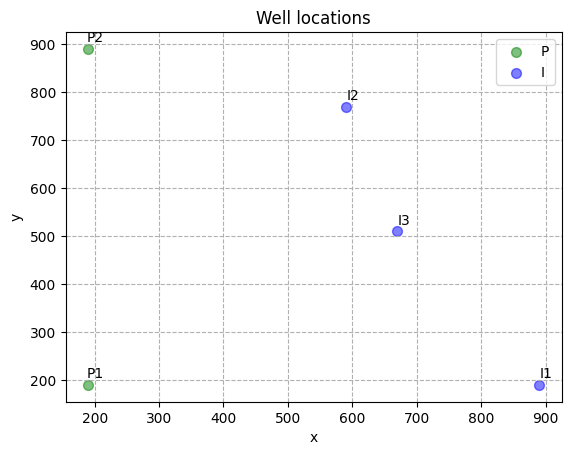

In [19]:
# create a dictionary that maps categories to colors
color_dict = {"P": "green", "I": "blue"}

# generate a scatter plot with color-coded points
for group, color in color_dict.items():
    df_cat = df_coords[df_coords["group"] == group]
    plt.scatter(df_cat["x"], df_cat["y"], s=50, alpha=0.5, color=color, label=group)

for i, row in df_coords.iterrows():
    plt.annotate(
        row["cat"],
        (row["x"], row["y"]),
        textcoords="offset points",
        xytext=(5, 5),
        ha="center",
        color="k",  # change the text color to red
    )

# add labels and legend
plt.title("Well locations")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(ls="--")
plt.legend()

In [20]:
# load data

path = "data.csv"
df = pd.read_csv(path)
print(df.sample(5).to_markdown())
df.head()

|       | cat   | group   |   date |           oil |       water |      liquid |         bhp |   status |   start_lag |   coef | is_base   |
|------:|:------|:--------|-------:|--------------:|------------:|------------:|------------:|---------:|------------:|-------:|:----------|
| 16606 | P2    | P       |     21 |  -0.000430913 | -0.00312494 | -0.00355585 | 2e+07       |        1 |          14 |   0.58 | False     |
|  9366 | P2    | P       |     13 |  -0.000626416 | -0.00166533 | -0.00229175 | 2e+07       |        1 |          14 |   0.33 | False     |
| 13168 | I2    | I       |     23 | nan           |  0.001267   |  0.001267   | 3.46553e+07 |        1 |          15 |   0.67 | False     |
|   266 | P2    | P       |     23 |  -0.000389909 | -0.00264741 | -0.00303732 | 2e+07       |        1 |          21 |   0.42 | False     |
|  6636 | P2    | P       |      7 |  -0.00142229  | -0.00109381 | -0.0025161  | 2e+07       |        1 |           1 |   0.17 | False     |


,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
0,P1,P,0,-0.001621,0.000000,-0.001621,2.000000e+07,1.0,19.0,0.42,False
1,P2,P,0,-0.001903,0.000000,-0.001903,2.000000e+07,1.0,19.0,0.42,False
2,I1,I,0,NaN,0.002533,0.002533,4.018987e+07,1.0,19.0,0.42,False
3,I2,I,0,NaN,0.001267,0.001267,3.665494e+07,1.0,19.0,0.42,False
4,I3,I,0,NaN,NaN,NaN,NaN,0.0,19.0,0.42,False


In [21]:
# define the colormap to use
cmap = plt.get_cmap("Set2")

coefs = sorted(df["coef"].unique())

# convert the coefs list to a numpy array
coefs = np.array(coefs)

# use isnan() to create a boolean array indicating which values are NaN
mask = np.isnan(coefs)

# use the boolean array to select only the non-NaN values
coefs = coefs[~mask]

# generate a list of colors, one for each category
colors = cmap(np.linspace(0, 1, len(coefs)))

# create a dictionary that maps categories to colors
color_dict = dict(zip(coefs, colors))
color_dict

{0.08: array([0.4       , 0.76078431, 0.64705882, 1.        ]),
 0.17: array([0.98823529, 0.55294118, 0.38431373, 1.        ]),
 0.25: array([0.55294118, 0.62745098, 0.79607843, 1.        ]),
 0.33: array([0.90588235, 0.54117647, 0.76470588, 1.        ]),
 0.42: array([0.65098039, 0.84705882, 0.32941176, 1.        ]),
 0.5: array([1.        , 0.85098039, 0.18431373, 1.        ]),
 0.58: array([0.89803922, 0.76862745, 0.58039216, 1.        ]),
 0.67: array([0.70196078, 0.70196078, 0.70196078, 1.        ])}

Text(0.5, 0, 'timestamp')

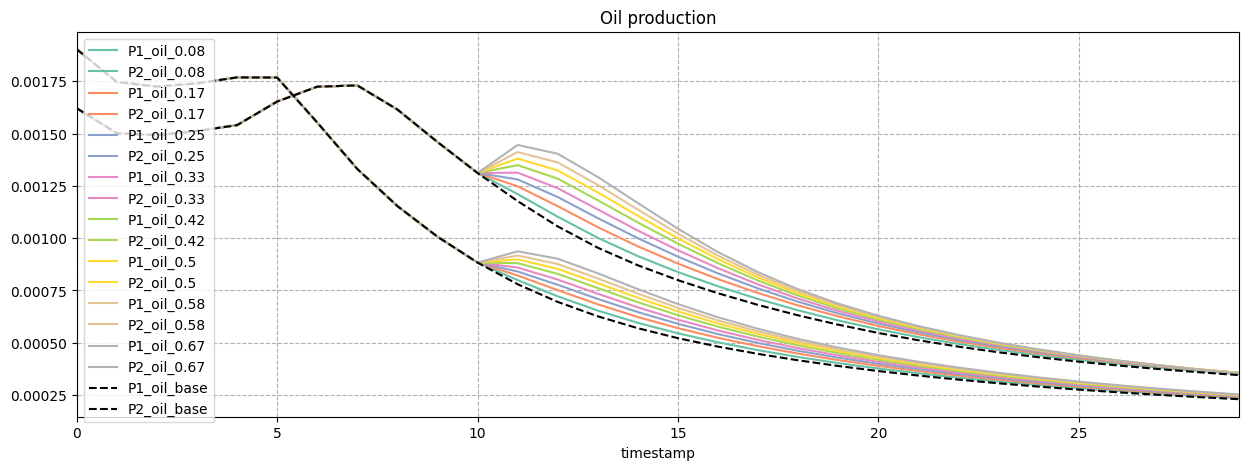

In [22]:
# create a new figure with a single set of axes
fig, ax = plt.subplots(figsize=(15, 5))

# iterate over all combinations of coef, start_lag, and segment
for coef, start_lag, segment in itertools.product(
    coefs,
    df["start_lag"].unique()[3:4],
    df["cat"].unique()[:2],
):
    data = df[
        (df["cat"] == segment) & (df["coef"] == coef) & (df["start_lag"] == start_lag)
    ]
    # select the color for the plot based on the category
    color = color_dict[coef]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        np.abs(data["oil"]),
        label=f"{segment}_oil_{coef}",
        color=color,
    )

for segment in df["cat"].unique()[:2]:
    data = df[(df["cat"] == segment) & (df["is_base"] == True)]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        np.abs(data["oil"]),
        label=f"{segment}_oil_base",
        color="k",
        ls="--",
    )

# set the x-axis limits, legend location, title, and grid
ax.set_xlim(df["date"].min(), df["date"].max())
ax.legend(loc="upper left")
ax.set_title("Oil production")
ax.grid(ls="--")
ax.set_xlabel("timestamp")

In [23]:
df["start_lag"].unique()[3:4]

array([10.])

When the `I3` well was activated during the 19th timestep, the oil production rates (`oil`) of `P1` & `P2` began to increase. This can be attributed to the injection of water by the `I3` well into the reservoir, which supports the reservoir pressure. As a result, the reservoir pressure increases and enhances the force that drives the fluid out of the reservoir.

Text(0.5, 0, 'timestamp')

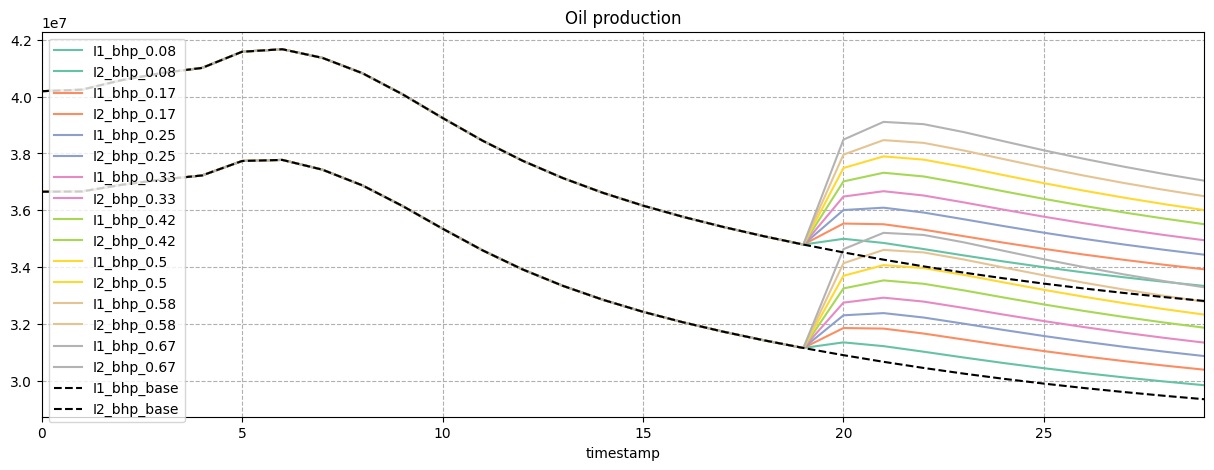

In [24]:
# create a new figure with a single set of axes
fig, ax = plt.subplots(figsize=(15, 5))

# iterate over all combinations of coef, start_lag, and segment
for coef, start_lag, segment in itertools.product(
    coefs,
    df["start_lag"].unique()[:1],
    df["cat"].unique()[2:4],
):
    data = df[
        (df["cat"] == segment) & (df["coef"] == coef) & (df["start_lag"] == start_lag)
    ]
    # select the color for the plot based on the category
    color = color_dict[coef]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        data["bhp"],
        label=f"{segment}_bhp_{coef}",
        color=color,
    )

for segment in df["cat"].unique()[2:4]:
    data = df[(df["cat"] == segment) & (df["is_base"] == True)]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        np.abs(data["bhp"]),
        label=f"{segment}_bhp_base",
        color="k",
        ls="--",
    )

# set the x-axis limits, legend location, title, and grid
ax.set_xlim(df["date"].min(), df["date"].max())
ax.legend(loc="upper left")
ax.set_title("Oil production")
ax.grid(ls="--")
ax.set_xlabel("timestamp")

Furthermore, the bottomhole pressure (`bhp`) of the wells `I1` & `I2` began to increase after `I3` activation during the 19th timestep. This can be attributed to the water injection by the `I3` well into the reservoir, which supports the reservoir pressure and helps maintain the `bhp`.

In [25]:
df

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
0,P1,P,0,-0.001621,0.000000,-0.001621,2.000000e+07,1.0,19.0,0.42,False
1,P2,P,0,-0.001903,0.000000,-0.001903,2.000000e+07,1.0,19.0,0.42,False
2,I1,I,0,NaN,0.002533,0.002533,4.018987e+07,1.0,19.0,0.42,False
3,I2,I,0,NaN,0.001267,0.001267,3.665494e+07,1.0,19.0,0.42,False
4,I3,I,0,NaN,NaN,NaN,NaN,0.0,19.0,0.42,False
...,...,...,...,...,...,...,...,...,...,...,...
28915,I2,I,28,0.000000,0.001267,0.001267,2.947955e+07,1.0,NaN,NaN,True
28916,P1,P,29,-0.000345,-0.001319,-0.001665,2.000000e+07,1.0,NaN,NaN,True
28917,P2,P,29,-0.000230,-0.001906,-0.002136,2.000000e+07,1.0,NaN,NaN,True
28918,I1,I,29,0.000000,0.002533,0.002533,3.281453e+07,1.0,NaN,NaN,True


In [10]:
df.nunique()

cat             5
group           2
date           30
oil          6397
water        6253
liquid       6406
bhp          9565
status          2
start_lag      24
coef            8
is_base         2
dtype: int64

In [11]:
# liquid feature is evidently excessive cause it's linearly dependent of two others == from now on I choose to forecast just the oil pr
(df["oil"] + df["water"] - df["liquid"]).sum()
dfv1 = df.drop(columns=["liquid"])
# also there is one column with clearly boolean values
dfv1["status"] = dfv1["status"].astype("bool")
dfv1.dtypes

cat           object
group         object
date           int64
oil          float64
water        float64
bhp          float64
status          bool
start_lag    float64
coef         float64
is_base         bool
dtype: object

In [12]:
# Dealing with NaN values's origin
df.isna().sum()

cat              0
group            0
date             0
oil          17280
water         2592
liquid        2592
bhp           2592
status           0
start_lag      120
coef           120
is_base          0
dtype: int64

In [13]:
features_w_NANs = dfv1.columns[dfv1.isna().any()]
features_wo_NANs = dfv1.columns[~dfv1.isna().any()]
# NaN rows of corresponding features
dfv1[features_w_NANs][dfv1.isna().any(axis=1)]

,oil,water,bhp,start_lag,coef
2,NaN,0.002533,4.018987e+07,19.0,0.42
3,NaN,0.001267,3.665494e+07,19.0,0.42
4,NaN,NaN,NaN,19.0,0.42
7,NaN,0.002533,4.024292e+07,19.0,0.42
8,NaN,0.001267,3.666387e+07,19.0,0.42
...,...,...,...,...,...
28915,0.000000,0.001267,2.947955e+07,NaN,NaN
28916,-0.000345,-0.001319,2.000000e+07,NaN,NaN
28917,-0.000230,-0.001906,2.000000e+07,NaN,NaN
28918,0.000000,0.002533,3.281453e+07,NaN,NaN


In [14]:
# separate base case (2 inj wells, 2 prod wells), normal operation
dfv1_base = dfv1[dfv1["is_base"] == True]
# all 4 wells in operation, status feature could be dropped
(dfv1_base["status"] == False).any()
# purified base case, start_lag and coef NaNs are absent, can't be populated just with zeros and should be deleted/ignored for the base case
dfv1_base = dfv1_base.drop(columns=["start_lag", "coef", "is_base", "status"])
dfv1_base

,cat,group,date,oil,water,bhp
28800,P1,P,0,-0.001621,0.000000,2.000000e+07
28801,P2,P,0,-0.001903,0.000000,2.000000e+07
28802,I1,I,0,0.000000,0.002533,4.018987e+07
28803,I2,I,0,0.000000,0.001267,3.665494e+07
28804,P1,P,1,-0.001502,0.000000,2.000000e+07
...,...,...,...,...,...,...
28915,I2,I,28,0.000000,0.001267,2.947955e+07
28916,P1,P,29,-0.000345,-0.001319,2.000000e+07
28917,P2,P,29,-0.000230,-0.001906,2.000000e+07
28918,I1,I,29,0.000000,0.002533,3.281453e+07


In [15]:
# sanity check, that base case doesn't contain any unexpected NaNs after purifying
dfv1_base.isna().any().all()

False

In [16]:
# separate test case (3 inj wells, 2 prod wells), all normal operation except for I3
dfv1_test = dfv1[dfv1["is_base"] == False].drop(columns=["is_base"])

In [17]:
# sanity check we only mess with I3 pump sometimes
print(dfv1_test[dfv1_test["status"] == False]["cat"].unique())

['I3']


In [18]:
# sanity check that I3 is kept turned off during given lag time
(
    dfv1_test[(dfv1_test["cat"] == "I3") & (dfv1_test["status"] == False)]["start_lag"]
    > 0
).all()

True

In [19]:
# NaNs TEST CASE
dfv1_test.isna().any()

cat          False
group        False
date         False
oil           True
water         True
bhp           True
status       False
start_lag    False
coef         False
dtype: bool

In [20]:
# we have just 3 columns that contains some NaNs
NaN_cols = dfv1_test.columns[dfv1_test.isna().any()]
dfv1_test[dfv1_test.isna().any(axis=1)][NaN_cols].isna().sum()

oil      17280
water     2592
bhp       2592
dtype: int64

In [21]:
# when I3 pump is turned off, those corresponding 2592 water\oil\bhp NaN values could and should be interpreted as zeros
I3_off_condition = (
    (dfv1_test[NaN_cols].isna().any(axis=1))
    & (dfv1_test["status"] == False)
    & (dfv1_test["cat"] == "I3")
)

dfv1_test[I3_off_condition].isna().sum()
dfv1_test[I3_off_condition] = dfv1_test[I3_off_condition].fillna(0)

In [22]:
# sanity check, so there aren't any more NaNs caused by disabled I3 pump
dfv1_test[I3_off_condition].isna().any().all()

False

In [23]:
# Remaining 14688 oil column NaNs are caused by injecting wells that don't produce any oil, and therefore could be set as zero
dfv1_test.isna().sum(), dfv1_test[dfv1_test.isna().any(axis=1)]["cat"].unique()

(cat              0
 group            0
 date             0
 oil          14688
 water            0
 bhp              0
 status           0
 start_lag        0
 coef             0
 dtype: int64,
 array(['I1', 'I2', 'I3'], dtype=object))

In [24]:
inj_wells_oil_condition = (dfv1_test[["oil"]].isna().any(axis=1)) & (
    dfv1_test["group"] == "I"
)
dfv1_test.isna().sum()
dfv1_test[inj_wells_oil_condition] = dfv1_test[inj_wells_oil_condition].fillna(0)

In [25]:
# FINAL check for NaNs
dfv1_test.isna().any().all()

False

In [26]:
# our DF hasn't been yet arranged by 'date', from now on it's sequential (keep 2 cases separated)
dfB = dfv1_base.sort_values(by=["date"])
dfT = dfv1_test.sort_values(by=["date"])
dfB.shape, dfT.shape

((120, 6), (28800, 9))

In [27]:
dfT.nunique()

cat             5
group           2
date           30
oil          6387
water        6243
bhp          9556
status          2
start_lag      24
coef            8
dtype: int64

In [28]:
# I3 pump control methods: on/off in specific moments and coeff?? why 18???
dfT["bhp"].describe()

count    2.880000e+04
mean     2.646976e+07
std      1.161208e+07
min      0.000000e+00
25%      2.000000e+07
50%      2.978223e+07
75%      3.637821e+07
max      4.950009e+07
Name: bhp, dtype: float64

In [29]:
dfT

,cat,group,date,oil,water,bhp,status,start_lag,coef
0,P1,P,0,-0.001621,0.000000,2.000000e+07,True,19.0,0.42
12753,I2,I,0,0.000000,0.001267,3.665494e+07,True,13.0,0.67
8100,P1,P,0,-0.001621,0.000000,2.000000e+07,True,20.0,0.33
8101,P2,P,0,-0.001903,0.000000,2.000000e+07,True,20.0,0.33
21300,P1,P,0,-0.001621,0.000000,2.000000e+07,True,7.0,0.50
...,...,...,...,...,...,...,...,...,...
18445,P1,P,29,-0.000392,-0.002081,2.000000e+07,True,17.0,0.50
18299,I3,I,29,0.000000,0.001900,3.377180e+07,True,21.0,0.50
18298,I2,I,29,0.000000,0.001267,3.239776e+07,True,21.0,0.50
18296,P2,P,29,-0.000285,-0.002969,2.000000e+07,True,21.0,0.50


In [30]:
# we have 2 wells as our targets, filter them out
targets_ = dfT[dfT["group"] == "P"]
# some features still persist in those targets, moreover we want to get rid of all useless features (seems bhp is useless too)
print(targets_.nunique())
# seems P12 pumps are always on both when we measure oil production, that's why their status is useless
targets_ = targets_.drop(columns=["group", "status", "bhp"])
# we dont't care about the amount of water coming out with that oil
targets_ = targets_.drop(columns=["water"])
targets_

cat             2
group           1
date           30
oil          6386
water        6233
bhp             1
status          1
start_lag      24
coef            8
dtype: int64


,cat,date,oil,start_lag,coef
0,P1,0,-0.001621,19.0,0.42
8100,P1,0,-0.001621,20.0,0.33
8101,P2,0,-0.001903,20.0,0.33
21300,P1,0,-0.001621,7.0,0.50
12751,P2,0,-0.001903,13.0,0.67
...,...,...,...,...,...
18596,P2,29,-0.000250,10.0,0.50
18595,P1,29,-0.000355,10.0,0.50
18446,P2,29,-0.000270,17.0,0.50
18445,P1,29,-0.000392,17.0,0.50


In [31]:
# we don't care which well produces this oil?
# I only keep coef and start_lag to denote different experiments
targets_ = targets_.groupby(by=["date", "coef", "start_lag"], as_index=False).sum(
    numeric_only=True
)
targets_

,date,coef,start_lag,oil
0,0,0.08,1.0,-0.003525
1,0,0.08,2.0,-0.003525
2,0,0.08,3.0,-0.003525
3,0,0.08,4.0,-0.003525
4,0,0.08,5.0,-0.003525
...,...,...,...,...
5755,29,0.67,20.0,-0.000719
5756,29,0.67,21.0,-0.000735
5757,29,0.67,22.0,-0.000753
5758,29,0.67,23.0,-0.000773


In [32]:
features_ = dfT[dfT["group"] == "I"]
print(features_.nunique())
# drop target and useless columns
features_ = features_.drop(columns=["group", "oil"])
# status denotes condition of just the I3 pump and clearly correlates with start_lag that's why it's excluded
features_ = features_.drop(columns=["status"])
features_

cat             3
group           1
date           30
oil             1
water          11
bhp          9555
status          2
start_lag      24
coef            8
dtype: int64


,cat,date,water,bhp,start_lag,coef
12753,I2,0,0.001267,3.665494e+07,13.0,0.67
8102,I1,0,0.002533,4.018987e+07,20.0,0.33
8103,I2,0,0.001267,3.665494e+07,20.0,0.33
8104,I3,0,0.000000,0.000000e+00,20.0,0.33
12752,I1,0,0.002533,4.018987e+07,13.0,0.67
...,...,...,...,...,...,...
18448,I2,29,0.001267,3.227405e+07,17.0,0.50
18447,I1,29,0.002533,3.594549e+07,17.0,0.50
18299,I3,29,0.001900,3.377180e+07,21.0,0.50
18298,I2,29,0.001267,3.239776e+07,21.0,0.50


In [33]:
# sanity check 5760 * 3 = 17280

In [34]:
test0 = features_[features_.date == 0]

In [35]:
# 24 * 8 * 3

In [36]:
features_.nunique()
# features_[features_["cat"] == "I3"].nunique()

cat             3
date           30
water          11
bhp          9555
start_lag      24
coef            8
dtype: int64

In [37]:
# naive interpretation: sequence of 2(3) words like (I1,I2,I3) or (I1,I2,0)
# CAT <--> WORD_SIZE = 2 or 3 (letters)
# water,bhp <--> DICT_SIZE = 9555*11 at most (with sth like simple positional embedding cause 0 <--> I3 off)
# DATE <--> SEQ_LENGTH = 30 words
# TRAIN_SIZE <--> 24*8

In [38]:
# We could do even better, exclude not just status of I3 but start_lag from features
# zeros in water/bhp already contain enough information about start_lag: seq of 12 zeros in I3 water intake corresponds to start_lag=12
features_[(features_.water == 0) & (features_.start_lag == 12)]["date"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [39]:
# 3193 possible values for I1, I2 but 3169*9 for I3
[
    (
        "Well #I"
        + str(i + 1)
        + " "
        + str(
            features_[features_.cat == "I" + str(i + 1)][["water", "bhp"]]
            .nunique()
            .values
        )
    )
    for i in range(3)
]

['Well #I1 [   1 3193]', 'Well #I2 [   1 3193]', 'Well #I3 [   9 3169]']

In [40]:
# for instance, note that water intake remains constant for both old injection wells
features_[features_.cat == "I2"]["water"].unique(), features_[features_.cat == "I1"][
    "water"
].unique()

(array([0.001267]), array([0.002533]))

In [41]:
# Interpretation 2:
# we are given WORD_EMBEDDINGs w/ positional encoding, each word aka state = 2d tensor (I1,I2,I3)
# DATE <--> SEQ_LENGTH = 30 words
# TRAIN_SIZE <--> 8

In [42]:
start_lags = features_.start_lag.unique()
start_lags

array([13., 20.,  3.,  7., 18., 21.,  6., 14., 15., 17.,  9., 23.,  4.,
       12., 22., 10.,  8., 19., 24., 16., 11.,  1.,  2.,  5.])

In [43]:
features_[features_.cat != "I3"].drop(columns=["water"])

,cat,date,bhp,start_lag,coef
12753,I2,0,3.665494e+07,13.0,0.67
8102,I1,0,4.018987e+07,20.0,0.33
8103,I2,0,3.665494e+07,20.0,0.33
12752,I1,0,4.018987e+07,13.0,0.67
1503,I2,0,3.665494e+07,3.0,0.42
...,...,...,...,...,...
18598,I2,29,3.205374e+07,10.0,0.50
18597,I1,29,3.571501e+07,10.0,0.50
18448,I2,29,3.227405e+07,17.0,0.50
18447,I1,29,3.594549e+07,17.0,0.50


In [44]:
# exclude water intake for I1,I2, leave just bhp and set global multiindex as (date, coef, start_lag)
features_I1 = (
    features_[features_.cat == "I1"]
    .drop(columns=["cat", "water"])
    .set_index(["date", "coef", "start_lag"])
    .rename(columns={"bhp": "b1"})
)
features_I2 = (
    features_[features_.cat == "I2"]
    .drop(columns=["cat", "water"])
    .set_index(["date", "coef", "start_lag"])
    .rename(columns={"bhp": "b2"})
)
# for I3 we keep both water and bhp values for future feature engineering
features_I3 = (
    features_[features_.cat == "I3"]
    .drop(columns=["cat"])
    .set_index(["date", "coef", "start_lag"])
    .rename(columns={"water": "w3", "bhp": "b3"})
)
# additional checkup for consistence
print(
    f"hor shapes of all 3x dfs are equal?? {features_I3.shape[0] == features_I2.shape[0] == features_I1.shape[0]}"
)
features_I1.isna().any(), features_I2.isna().any(), features_I3.isna().any()

hor shapes of all 3x dfs are equal?? True


(b1    False
 dtype: bool,
 b2    False
 dtype: bool,
 w3    False
 b3    False
 dtype: bool)

In [45]:
features = pd.concat([features_I1, features_I2, features_I3], axis=1)
features.nunique()

b1    3193
b2    3193
w3       9
b3    3169
dtype: int64

In [46]:
# features.loc[25, 0.17, :]
# features.loc[:, 0.33, 20.0]
# features

In [47]:
targets = targets_.set_index(["date", "coef", "start_lag"]).rename(
    columns={"oil": "trg"}
)

In [48]:
# join by multiindex and get rid of that finally
df_ = pd.concat([features, targets], axis=1)
df_.nunique()
# DataFrame (coef, bhp#1, bhp#2, bhp#3, water#3, pipe) with multiindex (date,coef,start_lag);

b1     3193
b2     3193
w3        9
b3     3169
trg    3193
dtype: int64

In [49]:
def shaping(dframe: pd.DataFrame) -> np.ndarray:
    """receives pandas dataframe, generates 3-dimensional tensor with scaled data"""
    data = []
    # we have 3 levels of multiindex [d, c, l] and want to iterate over
    # last 2 levels only (to get 192 sequences of length 30)
    for cl_index, df_select in dframe.groupby(level=[1, 2]):
        # we leave coeff as a meaningful feature and get rid of 'date' as
        # it's equivalent to auto-generated df index
        df_select = (
            df_select.reset_index().drop(columns=["date", "start_lag"]).to_numpy()
        )
        # make oil production positive for comp with relu
        df_select = np.apply_along_axis(lambda trg: -trg, 1, df_select)

        data.append(df_select)
    # stack all sequences (matrices) into 3-dimensional tensor
    return np.stack(data)


def ts_cv(arr: np.ndarray, folds=8, t_size=3, gap_size=1, random_seed=42):
    """we are given multivariate time series array, permute "rows" in 1st dim,
    then take forward chaining CV approach in 2nd (time) dim"""
    CV = []
    # shuffle array rows (192)
    rng = np.random.default_rng(seed=random_seed)
    arr_sr = rng.permuted(arr, axis=0)

    # train test splits along time axis
    from sklearn.model_selection import TimeSeriesSplit

    tscv = TimeSeriesSplit(n_splits=folds, test_size=t_size, gap=gap_size)
    # we don't actually need an array, we take whole time range and retrieve splitting indices
    timestamps = range(arr_sr.shape[1])
    print(f"{folds}-fold CV for times series w/ test size {t_size} and gap {gap_size}")
    for i, (train_index, test_index) in enumerate(tscv.split(timestamps)):
        # print(f"Fold {i+1}:")
        # print(f"  Train: index={train_index}")
        # join train_index with a gap for our case
        gap_start_timestep = train_index[-1] + 1
        gap_index = np.arange(gap_start_timestep, gap_start_timestep + gap_size)
        train_index_gap = np.append(train_index, gap_index)
        # print(f"  Train: index={train_index_gap}")
        # print(f"  Test:  index={test_index}")
        curr_train_part = arr_sr[:, train_index_gap, :]
        curr_test_part = arr_sr[:, test_index, :]
        CV.append((curr_train_part, curr_test_part))
        print(f"Fold {i}: Train {curr_train_part.shape} | Test {curr_test_part.shape}")

    return CV


# from sklearn.preprocessing import StandardScaler


class AdaScale:
    def __init__(self):
        self.scalers = []
        self.res_array = None
        from sklearn.preprocessing import StandardScaler

    def scale(self, arr: np.ndarray, trg_scale=True):
        """searches (masks out) the very first moment in time (i) with at least 2 distinct
        values (amongst 192 possible) to calculate stats (for each feature) at this moment
        """
        processed = []
        for f in range(arr.shape[2] if trg_scale else arr.shape[2] - 1):
            # get a particular moment in time
            mask = np.apply_along_axis(
                lambda x: np.unique(x).shape[0] > 1, 0, arr[:, :, f]
            )
            # [False False  True  True  True  True  True  True  True  True  True ...]<30
            # return (tuple of) nonzero=False indices of mask
            # [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,...]
            # get rid of tuple, first nonzero index in underlying array is what we need
            i = np.nonzero(mask)[0][0]
            # scale feature f based on its batch stats at i-th moment
            scaler = StandardScaler()
            # restore last axis as this scaler requires 2d array to fit
            scaler.fit(arr[:, i, f, np.newaxis])
            prev = arr[:, :, f, np.newaxis]
            orig_shape = prev.shape[0:2]
            # scale all values at all timesteps (no future data leak as our stats collected earlier!)
            scaled_part_f = scaler.transform(prev.reshape(-1, 1)).reshape(orig_shape)
            self.scalers.append(scaler), processed.append(scaled_part_f)
        # print(np.stack([(s.mean_[0], s.var_[0]) for s in scalers]))
        if not trg_scale:
            # skip connect target if it's not processed
            processed.append(arr[:, :, -1])
            # denote non-scaling like that
            self.scalers.append(None)
        self.res_array = np.stack(processed, axis=-1)
        return self.res_array


def batch_scaling(list_of_splits, trg_scale=True):
    """applies AdaScale to all CV splits [(X_train_0, X_test_0), ...]"""
    result = []
    scalers = []
    for fold, split in enumerate(list_of_splits):
        # can't use one-liner cause i might need scalers to invert in future
        # result.append(list(map(lambda s: AdaScale(s, trg_scale), split)))
        tr_sc, te_sc = AdaScale(), AdaScale()
        tr_sc.scale(split[0]), te_sc.scale(split[1])
        result.append((tr_sc.res_array, te_sc.res_array))
        scalers.append((tr_sc.scalers, te_sc.scalers))
    print(
        f"All {len(list_of_splits)} CV folds have been standardized, w/ target: {trg_scale}"
    )
    return result

In [50]:
# shaping our data for custom forecasting
def get_consequent_batches(lst, n, m):
    """yields n+m-sized chunks from lst partitioned as n,m"""
    for i in range(len(lst)):
        # split onto n+m chunks (some might be smaller or empty)
        chunk = lst[i : i + n + m]
        # partition and yield both (consequent) parts (if present) of each chunk
        if len(chunk) == n + m:
            yield chunk[:n], chunk[n:]
        # else:
        #     print(f"remains: {chunk}")


def series_to_supervised(
    arr: np.ndarray,
    n_past: int,
    n_future: int,
    time_axis=1,
    target_axis=5,
    verbose=False,
    link=None,
):
    """reorganizes unsupervised time series data into a supervised representation of a given shape:
    n_past = amount of past timesteps used for prediction
        n_future = amount of future timesteps we want to predict
            time_axis parameter is unused, np.take_along_axis could be used to implement that
    """
    assert arr.ndim == 3, f"-->Incorrect array shape, {arr.ndim} instead of 3<--"
    total_duration = arr.shape[time_axis]
    # create a list of indices based just on array's length
    idx = [*range(total_duration)]
    # generate consequent batches splitted as n_past, n_future
    generator = get_consequent_batches(idx, n_past, n_future)
    # returns a list of paired arrays X, y and list of corresponding old timestamps for visualization purposes
    out, timestamps = [], []
    for s in generator:
        # in case we've already created another (train) dataset and dealing with remainder
        if link:
            # note that for link(train) it's already been implemented as an attribute of class
            link_timestamps = link.future_ts
            # shift for test (taking into account train duration and a gap=n_future steps from class att)
            gap, train_dur = link.config[1], link.orig_shape[1]
            shift = gap + train_dur
            # convert each future (only) timestep s[1] from local to global time index:
            s_ = (s[0], [i + shift for i in s[1] if i + shift <= 29])
            # populate GLOBAL future timestamps list and array only when all {N_FUTURE} points are present
            if len(s_[1]) == link.config[1]:
                timestamps.append(s_)
                # make corresponding changes in array (LOCAL TIMESTAMPS!) and feature-target split
                out.append(
                    (
                        arr[:, s[0], :],
                        np.expand_dims(arr[:, s[1], target_axis], axis=-1),
                    )
                )
        else:
            timestamps.append(s)
            # make corresponding changes in array and feature-target split
            out.append(
                (arr[:, s[0], :], np.expand_dims(arr[:, s[1], target_axis], axis=-1))
            )
    assert (
        len([f for f in timestamps]) != 0
    ), f"WRONG CFG, TEST DATASET IS NOT SUFFICIENT TO FIT ALL {N_FUTURE} PREDICTED POINTS"

    # genexp could be iterated just once but i need it twice, that's why it's not returned in an instant
    if verbose:
        print(
            f"time series interval of {total_duration} has been reshaped into {len(timestamps)} consequent ({'X'*n_past}|{'y'*n_future}) chunk(s) "
        )
    # !we want to use all X_train data for prediction, therefore we will need a gap between train and test data split
    # this implies given arr is not just X_train but also w/ corresponding gap = n_future
    return out, timestamps

In [51]:
test_array = np.random.rand(192, 25, 6)
res, i = series_to_supervised(test_array, n_past=4, n_future=2, target_axis=5)
# 2nd chunk (pair), 6 features, 1 target (each is a vector sized 192)
res[2][0].shape, res[2][1].shape

((192, 4, 6), (192, 2, 1))

In [93]:
# visualization helpers
def p_method(x_data):
    """evading eval()"""
    return plt.scatter if len(x_data) == 1 else plt.plot


def group(nested_list, data):
    """group data values at same timesteps"""
    from collections import defaultdict

    # if the key isn't present, returns this function, i.e. values become populated with lists by default
    d = defaultdict(list)
    for i, triplet in enumerate(nested_list):
        for timestep in range(len(triplet)):
            # data array may come in 2d or 3d format
            if len(data.shape) == 3:
                d[triplet[timestep]].append(data[:, i, timestep])
            elif len(data.shape) == 2:
                d[triplet[timestep]].append(data[i, timestep])
            else:
                print(triplet, data.shape, "STH WRONG")
    # d[bin#][element#] = (192,)-shaped numpy array
    return d
    # return list(d.items())


def plot_g(dict_groups):
    # aka 'unzips' list of tuples into two lists
    x, y = zip(*sorted(dict_groups.items()))
    return x, y


def apply_g(dict_groups, fun, **kwargs):
    """calc some stats over values-lists"""
    return {k: fun(np.stack(v, axis=0), **kwargs) for k, v in dict_groups.items()}


def aio_errbar(dataset, model=None, method=False):
    """produces everything you may need for errorbar plot of model predictions,
     our dataset consists of two parts and target=0 means predictions on X-part of that,
    method argument is meant for non-torch models equipped with fit method"""
    if not model:
        # take (B*#chunks=3072, n_future=3, tar shape=1) split #chunks (kept in .tar_shape) from batch -> (192, 16, 3)
        trg = dataset[:][1].cpu().numpy().reshape(-1, *dataset.tar_shape)
        datag = group(dataset.future_ts, trg)
    # let's predict but first of all, move everything to cpu and convert to numpy arrays (matplot uses numpy and so that, cpu)
    else:
        if method:
            # reshape (3072, 3, 6) to 2D (3072, 18), predict, then split #chunks (kept in .tar_shape) from batch -> (192, 16, 3)
            predict = model.predict(
                dataset[:][0].cpu().numpy().reshape(len(dataset), -1)
            ).reshape(-1, *dataset.tar_shape)
            # (192, 16, 3) -> d[bin#][element#] = (192,)-shaped numpy array
            datag = group(dataset.future_ts, predict)
        else:
            predict = (
                model(dataset[:][0])
                .detach()
                .cpu()
                .numpy()
                .reshape(-1, *dataset.tar_shape)
            )
            # we don't need any stats that depend of two variables so we could take batch mean now
            datag = group(dataset.future_ts, np.mean(predict, axis=0))

    # mean and std over bins, not batch!
    datag_mean = plot_g(apply_g(datag, np.mean, axis=0))
    datag_std = plot_g(apply_g(datag, np.std, axis=0))
    return datag_mean[0], datag_mean[1], datag_std[1]


def generalization_plot(statistics, func):
    plt.rcParams.update({"font.size": 20})
    plt.figure(figsize=(20, 10))
    epochs = range(len(statistics[0]))
    plt.plot(epochs, statistics[0], label="Training")
    plt.plot(epochs, statistics[1], label="testing")
    plt.legend()
    plt.xlabel(f"epochs / {STAT_INTERVAL}")
    plt.ylabel(f"{func} Loss")
    plt.yscale("log")
    plt.title(f"{statistics[2]} model train test w/ {func} loss", fontsize=30)


def compare_models(model_1, model_2, train_dataset, test_dataset, title="FILL IN"):
    with torch.inference_mode():
        model_1.eval(), model_2.eval()
        print(
            f"Check if train mode still on: {False if model_1.training == model_2.training == False else True}"
        )
        # predict
        m1p_train_eb = aio_errbar(train_dataset, model_1)
        m2p_train_eb = aio_errbar(train_dataset, model_2)
        m1p_test_eb = aio_errbar(test_dataset, model_1)
        m2p_test_eb = aio_errbar(test_dataset, model_2)
        # get mean target data
        tar_train_ = aio_errbar(train_dataset)[:2]
        tar_test_ = aio_errbar(test_dataset)[:2]
        # take the mean over batch (as it's not implemented in aio
        tar_train = (tar_train_[0], [np.mean(m) for m in tar_train_[1]])
        tar_test = (tar_test_[0], [np.mean(m) for m in tar_test_[1]])
    # print(
    #     f"trained to predict {train_dataset.future_ts} steps,\n tested to predict {train_dataset.future_ts} step(s)"
    # )
    plt.figure(figsize=(20, 10))
    plt.errorbar(*m1p_train_eb, c="darkorange", label="M1 train")
    plt.errorbar(*m2p_train_eb, c="cornflowerblue", label="M2 train")
    plt.errorbar(*m1p_test_eb, c="darkorange", label="M1 test")
    plt.errorbar(*m2p_test_eb, c="cornflowerblue", label="M2 test")

    # plt.plot(TRG, c="forestgreen", label="Real")
    plt.plot(*tar_train, c="forestgreen", label="Real train")
    plt.plot(*tar_test, c="forestgreen", label="Real test")

    plt.legend()
    plt.xlabel("timestamp")
    plt.ylabel("Target (absolute value) ")
    plt.grid(axis="x")
    # plt.yscale("log")
    plt.title(
        f"{title}",
        fontsize=20,
    )
    return plt.gcf(), plt.gca()


def plot_predictions(
    model, train_dataset, test_dataset, title="FILL IN", stats=None, combine=None
):
    """visualization for quality of XGBoost predictions, stats=some metric function,
    combine takes figure and axes to form combination with another plot"""
    # predict on both splits
    mp_train_eb_ = aio_errbar(train_dataset, model, method=True)
    mp_test_eb_ = aio_errbar(test_dataset, model, method=True)
    # get mean target data
    tar_train_ = aio_errbar(train_dataset, method=True)[:2]
    tar_test_ = aio_errbar(test_dataset, method=True)[:2]
    # take mean over batch
    mp_train_eb = (
        mp_train_eb_[0],
        [np.mean(m) for m in mp_train_eb_[1]],
        [np.mean(s) for s in mp_train_eb_[2]],
    )
    mp_test_eb = (
        mp_test_eb_[0],
        [np.mean(m) for m in mp_test_eb_[1]],
        [np.mean(s) for s in mp_test_eb_[2]],
    )
    tar_train = (tar_train_[0], [np.mean(m) for m in tar_train_[1]])
    tar_test = (tar_test_[0], [np.mean(m) for m in tar_test_[1]])
    if stats:
        # calculate stats
        stats_train = stats(np.stack(tar_train_[1], -1), np.stack(mp_train_eb_[1], -1))
        stats_test = stats(np.stack(tar_test_[1], -1), np.stack(mp_test_eb_[1], -1))

        plt.figure(figsize=(20, 10))
        p_method(mp_train_eb[0])(
            mp_train_eb[0], stats_train, label=f"{stats.__name__} train"
        )
        p_method(mp_test_eb[0])(
            mp_test_eb[0], stats_test, label=f"{stats.__name__} test"
        )

        plt.legend()
        plt.grid(axis="x")
        plt.xlabel(f"timestamp")
        plt.yscale("log")
        plt.title(f"XGBM {stats.__name__} loss over training dataset", fontsize=30)
    else:
        if combine:
            plt.figure(combine[0])
            plt.figure(figsize=(20, 10))
            plt.sca(combine[1])
            old_title = combine[1].get_title()
            plt.title(old_title + "\n" + title)
        else:
            plt.figure(figsize=(20, 10))
            plt.title(title, fontsize=30)

        plt.errorbar(
            *mp_train_eb,
            c="darkviolet",
            label="XGB train",
        )
        plt.errorbar(*mp_test_eb, c="darkviolet", label="XGB test")
        if not combine:
            plt.plot(*tar_train, c="forestgreen", label="Real train")
            plt.plot(*tar_test, c="forestgreen", label="Real test")

        plt.legend()
        plt.grid(axis="both")
        plt.xlabel("timestamp")
        plt.ylabel("Target (absolute value)")
        # plt.yscale("log")
    return plt.gcf(), plt.gca()

In [53]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchmetrics.functional import mean_absolute_percentage_error

from tqdm import tqdm
import os

PATH = "./nn"

# device agnostic boilerplate
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.device(device)
device


def tm_save(model, name="last"):
    """save model's state dictionary"""
    path = os.path.join(PATH, f"{name}.pth")
    try:
        os.mkdir(PATH)
    except FileExistsError:
        pass
    torch.save(model.state_dict(), path)
    return path


def tm_load(template_model, sd_path):
    """loads state dictionary into a template model"""
    template_model.load_state_dict(torch.load(sd_path))
    # print(list(template_model.parameters()))


class RMSELoss(nn.Module):
    """as pytorch doesn't yet have this loss"""

    def __init__(self):
        super().__init__()
        self.MSE = nn.MSELoss()

    def forward(self, y_pred, y_true):
        return torch.sqrt(self.MSE(y_pred, y_true))

In [54]:
def get_new_f(time, feature):
    """translates 2 original (T, F) coordinates to 1 new (flattened T(N_PAST) * STATE(6), C-order reindexed)
    and generates corresponding label"""
    assert time < N_PAST or feature < NF_ORIG, "WRONG INPUT INDICES"
    # extract old feature labels from dataframe (coef lays in multiindex and has to be inserted)
    labels = np.insert(df_.columns.values, 0, df_.index.names[1]).tolist()
    # add time index to labels (first time_index = 0 means earliest moment, i.e. T-3) and arrange those as rows in a matrix
    label_arr = np.array([[fl + f"|T-{3-m}" for fl in labels] for m in range(N_PAST)])
    # bring a list of indices to the same shape
    conversion_arr = np.arange(N_PAST * NF_ORIG).reshape(N_PAST, NF_ORIG)
    # in case we need an inversion, use [*np.ndindex(correspondence_matrix.shape)]
    return conversion_arr[time, feature], label_arr[time, feature]


def get_old_f(new_index):
    """inversion of get_new_f, returns tuple of (T, F) and proper label"""
    assert new_index < N_PAST * NF_ORIG, "WRONG INPUT INDEX"
    # iterate through all elements of 2D (N_PAST, NF_ORIG) matrix in C order and list indices
    conversion_list = [*np.ndindex(N_PAST, NF_ORIG)]
    coords = conversion_list[new_index]
    return coords, get_new_f(*coords)[1]


# get_new_f(2, 4)
# get_old_f(18)


class OilSequence(Dataset):
    """makes it compatble with pytorch dataloaders, outputs X, y and (?mem overhead) moves onto GPU if available
    optional shuffle parameter accepts a tuple with feature coords (time, feature) to shuffle for measuring importance
    """

    def __init__(
        self,
        data_array,
        past_pts: int,
        future_pts: int,
        cuda="cpu",
        shuffle_id=None,
        verbose=False,
        link=None,
    ):
        super().__init__()
        chunks, self.ts = series_to_supervised(
            arr=data_array,
            n_past=past_pts,
            n_future=future_pts,
            time_axis=1,
            target_axis=data_array.shape[-1] - 1,
            verbose=verbose,
            link=link,
        )

        assert (
            len(chunks) != 0
        ), "not enough data to populate even a single chunk, change ur parameters"

        self.orig_shape = data_array.shape
        self.config = past_pts, future_pts
        # (192, 3, 6) ---> (192, 3, 1) take 192*past_pts*(6) values as features and predict 192*future_pts*1 values (per chunk)
        # iterate through chunks and populate two lists
        past, future = zip(*chunks)
        # past = list of feature chunks (192, 18) of length #chunks (16), future = list of target chunks (192, 3) of length #chunks (16)
        # concatenate tensors from the list along first axis (new batch dim 192*16 ~ implicit 'iteration' through 1st dim and all chunks)
        if shuffle_id is not None:
            # shuffle row values for the given (only one) column for future inference investigation, flatten last 2 dims
            X_data_ = np.concatenate(past, axis=0)
            # .reshape(-1, self.config[0] * NF_ORIG)
            assert shuffle_id < self.config[0] * NF_ORIG, "WRONG SHUFFLE INDEX"
            tuple_id = get_old_f(shuffle_id)[0]
            # for simplicity, we provide "column" index within range 0...n_past*NF_ORIG and shuffle all rows in-place
            np.random.seed(RSEED)
            np.random.shuffle(X_data_[:, tuple_id[0], tuple_id[1]])
            self.X_data = torch.from_numpy(X_data_).type(torch.float).to(cuda)
        else:
            self.X_data = (
                torch.from_numpy(np.concatenate(past, axis=0))
                .type(torch.float)
                .to(cuda)
            )  # array of (192*16, 6, 3)
        # targets left unchanged
        self.y_data = (
            torch.from_numpy(np.concatenate(future, axis=0)).type(torch.float).to(cuda)
        )  # array of (192*16, 3, 1)
        # print(self.X_data.shape, self.y_data.shape)

        # as we populate chunks, we lose global timestamps(start all over), let's keep target timestamps for future viz
        self.future_ts = [f for p, f in self.ts]
        # note that iteration through chunks_list is hidden in a new batch dim but we predict target(s) per chunk
        # let's keep last part of that shape i.e. (amount of chunks, target size) to restore from batch in future
        self.tar_shape = (len(self.ts), future_pts)
        # array of (16, 3) for train, (1, 3) for test

    def __getitem__(self, idx: int):
        # retrieves X=(past_pts, 6 features) and y=(future_pts, 1 targets) via new batch idx
        return self.X_data[idx, :, :], self.y_data[idx, :, :]

    def __len__(self):
        return self.X_data.shape[0]

    def __repr__(self):
        return f"TS data array {self.orig_shape} has been reorganized into a design feature matrix {list(self.X_data.shape)} and {list(self.y_data.shape)} target"

In [55]:
RSEED = 42
NF_ORIG = 6
# HORIZON (STEPS)
N_PAST = 3
N_FUTURE = 3
N_FOLDS = 2
TEST_SIZE = 9
assert TEST_SIZE >= N_FUTURE + N_PAST, "CHANGE VALUES"

In [56]:
# Pipeline:
# convert pandas DataFrame to 3-dimensional numpy tensor
D = shaping(df_)
TRG = np.mean(D, 0)[:, 5]
# K-fold TSCV, results in list of K train and test splits with a gap inbetween
D_cv = ts_cv(D, folds=N_FOLDS, t_size=TEST_SIZE, gap_size=N_FUTURE, random_seed=RSEED)
# scale features (not the target)
# D_cv_scaled = batch_scaling(D_cv, trg_scale=True)
# df_.describe()
# stats for target
# np.mean(D_cv_scaled[4][0][0][:, :, 5]), np.std(D_cv_scaled[4][0][0][:, :, 5])

2-fold CV for times series w/ test size 9 and gap 3
Fold 0: Train (192, 12, 6) | Test (192, 9, 6)
Fold 1: Train (192, 21, 6) | Test (192, 9, 6)


In [57]:
# Example 1: Get 7-th fold train data scalers:
# D_cv_scaled[7][0][1]
# Example 2:Get 4-th fold train test data splits
# D_cv_scaled[4][0][0].shape, D_cv_scaled[4][1][0].shape

In [58]:
# choose one fold and wrap its train and test data into a dataset instance, link em together
CV_FOLD = 1
ds_train = OilSequence(D_cv[CV_FOLD][0], N_PAST, N_FUTURE, cuda=device, verbose=True)
ds_test = OilSequence(
    D_cv[CV_FOLD][1], N_PAST, N_FUTURE, cuda=device, verbose=True, link=ds_train
)
# ds_test.future_ts
NUM_FEATURES, NUM_TARGETS = ds_train[0][:][0].shape[-1], ds_train[0][:][1].shape[-1]
NUM_FEATURES, NUM_TARGETS
# TRG = np.mean(D_cv[CV_FOLD][0], 0)[:, 5]
ds_train[12][:][1].shape

time series interval of 21 has been reshaped into 16 consequent (XXX|yyy) chunk(s) 
time series interval of 9 has been reshaped into 1 consequent (XXX|yyy) chunk(s) 


torch.Size([3, 1])

In [59]:
# get 166 example's features, target and device
# ds_train[:][0].shape, ds_train[166][1].shape, ds_train[166][1].device
# OilSequence(D_cv_scaled[7][0][0], 3, 2, cuda=device)[:][0].device
# amount of batches per epoch
# ds_train[:][0].shape[0] / 192

In [60]:
# Training/testing loop
def train(
    model,
    data_split,
    optimizer,
    scheduler,
    loss_function,
    n_epochs,
    device,
    stats_interval=100,
    batch=None,
):
    train_losses, test_losses, mape_tests = [], [], []
    # compatible dataloader yields batches of (X,y) from this dataset
    full_length = ds_train[:][0].shape[0]
    bs = batch if batch else full_length
    train_dl = DataLoader(
        data_split[0],
        batch_size=bs,
        shuffle=True,
        num_workers=0,
    )
    test_dl = DataLoader(
        data_split[1],
        batch_size=bs,
        shuffle=True,
        num_workers=0,
    )
    epochs = tqdm(range(n_epochs))
    for e in epochs:
        for X_batch, y_batch in train_dl:
            model.train()
            # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            # forward step
            y_pred = model(X_batch)
            # calculate loss
            loss = loss_function(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
        if e % stats_interval == 0:
            model.eval()
            with torch.inference_mode():
                # get train loss
                train_loss = loss.detach()
                train_losses.append(train_loss.item())
                # forward step on test set
                mape_tests_, test_losses_ = [], []
                for X_batch_test, y_batch_test in test_dl:
                    y_pred_test = model(X_batch_test)
                    # calculate loss and other metrics
                    test_loss = loss_function(y_pred_test, y_batch_test)
                    mape_test = mean_absolute_percentage_error(
                        y_pred_test, y_batch_test
                    )
                    mape_tests_.append(mape_test.item())
                    test_losses_.append(test_loss.item())
                # averaged over test batches for stability as we use it for early stopping
                mape_tests.append(np.mean(mape_tests_))
                test_losses.append(np.mean(test_losses_))
                # epochs.set_description(f"RMSE test: {test_losses[-1]:g}", refresh=True)
                epochs.set_description(
                    f"test MAPE: {mape_tests[-1]:g} | RMSE: {test_losses[-1]:g}",
                    refresh=True,
                )
                # early stopping <-> stop if test MAPE starts to rise
                if len(mape_tests) > 100 and np.mean(mape_tests[-50:]) < mape_tests[-1]:
                    break
        scheduler.step()
    print(f"RMSE train  {train_loss:.09f} | test {test_loss:.09f}")
    return train_losses, test_losses, model.__class__.__name__


def TSCV(model, list_of_splits, opt, sched, loss_fun, n_ep, device):
    train_CV, test_CV = [], []
    for fold, split in enumerate(list_of_splits):
        stats = train(
            model1,
            (
                OilSequence(split[0], N_PAST, N_FUTURE, device),
                OilSequence(split[1], N_PAST, N_FUTURE, device),
            ),
            optimizer=opt,
            scheduler=sched,
            loss_function=loss_fun,
            n_epochs=n_ep,
            device=device,
            stats_interval=STAT_INTERVAL,
            batch=BATCH_SIZE,
        )
        # last values for train and test loss in this fold
        # print((stats[0][-1], stats[1][-1]))
        train_CV.append(stats[0][-1])
        test_CV.append(stats[1][-1])
    CV_train_loss = np.mean(train_CV)
    CV_test_loss = np.mean(test_CV)
    print(f"CV train loss {CV_train_loss:.09f} | CV test loss {CV_test_loss:.09f}")
    return CV_train_loss, CV_test_loss

In [61]:
def f_importance_score(model, cv_split, feature_id, metric_f, device="cpu"):
    """As we can't simpy remove 1 feature, feature importance for NN model = permutation importance
    To compute an importance score, we shuffle (1) feature in orig dataset and evaluate (pre-trained) model
    with some metric over BOTH SETS, then calculate a ratio for each feature (3Tx6F).
    If feature importance is high just for train, then it's probably a sign of overfitting
    """
    assert feature_id < N_PAST * NF_ORIG, "WRONG FEATURE INDEX"
    # create two normal datasets
    ds_train = OilSequence(cv_split[0], N_PAST, N_FUTURE, cuda=device)
    ds_test = OilSequence(cv_split[1], N_PAST, N_FUTURE, cuda=device)
    # create two datasets with shuffled feature
    ds_train_s = OilSequence(
        cv_split[0], N_PAST, N_FUTURE, cuda=device, shuffle_id=feature_id
    )
    ds_test_s = OilSequence(
        cv_split[1], N_PAST, N_FUTURE, cuda=device, shuffle_id=feature_id
    )
    # move to device (just in case) and evaluate model on both parts of split
    model.to(device), model.eval()
    # from now on, we just hope that have a lot of VRAM on GPU)
    with torch.inference_mode():
        # normal mode: compute metric using trained model and original datasets
        y_pred_train, y_real_train = model(ds_train[:][0]), ds_train[:][1]
        y_pred_test, y_real_test = model(ds_test[:][0]), ds_test[:][1]
        m_train = metric_f(y_pred_train, y_real_train).item()
        m_test = metric_f(y_pred_test, y_real_test).item()
        # permuted mode: compute metric using trained model and shuffled datasets
        y_pred_train_s, y_real_train_s = model(ds_train_s[:][0]), ds_train_s[:][1]
        y_pred_test_s, y_real_test_s = model(ds_test_s[:][0]), ds_test_s[:][1]
        m_train_s = metric_f(y_pred_train_s, y_real_train_s).item()
        m_test_s = metric_f(y_pred_test_s, y_real_test_s).item()
        # compute relative scores
        score = m_train_s / m_train, m_test_s / m_test
    return score


def f_importance_total(model, cv_split, metric_f, device="cpu"):
    """automate feature importance scoring, generates dataframe with all feature train/test scores"""
    scores, labels = [], []
    for f in range(N_PAST * NF_ORIG):
        score_f = f_importance_score(model, cv_split, f, metric_f, device="cpu")
        scores.append(score_f)
        labels.append(get_old_f(f)[1])
    # we have nested list or array with rows=(18 features) and columns=(2 scores for split)
    # we also need their labels:
    score_df = pd.DataFrame(scores, index=labels, columns=["Train ratio", "Test ratio"])
    return score_df

In [64]:
# building a RNN model
class RNN1(nn.Module):
    def __init__(
        self, input_features=NUM_FEATURES, out_targets=NUM_TARGETS, hidden_state=100
    ):
        super().__init__()
        self.bn = nn.BatchNorm1d(input_features, affine=False)
        self.rnn = nn.RNN(
            input_size=input_features,
            hidden_size=hidden_state,
            batch_first=True,
            num_layers=1,
        )
        self.linear = nn.Linear(in_features=hidden_state, out_features=NUM_TARGETS)
        # self.nl = nn.ReLU()
        # self.nl = nn.Tanh()
        # self.nl = nn.Sigmoid()
        self.nl = nn.Identity()

    def forward(self, x):
        """RNN prediction with Linear FCN"""
        # Temporal BatchNorm requires (B F L) input, but our x is (B L F) = (192*16, 3, 6)
        # Let's swap 2 last dims, apply BN to slices of size (B,L) and revert (as RNN requires (B L F) again)
        bn = self.bn(x.permute(0, 2, 1)).permute(0, 2, 1)
        rnn_out, aux = self.rnn(bn)
        return self.nl(self.linear(rnn_out))


# building a RNN-LSTM model
class LSTM1(nn.Module):
    def __init__(
        self,
        input_features=NUM_FEATURES,
        out_targets=NUM_TARGETS,
        hidden_state=50,
        rec_layers=1,
        hidden_layer=25,
    ):
        super().__init__()
        self.bn = nn.BatchNorm1d(input_features, affine=False)
        # self.bn2 = nn.BatchNorm1d(hidden_layer, affine=True)
        self.lstm = nn.LSTM(
            input_size=input_features,
            hidden_size=hidden_state,
            num_layers=rec_layers,
            batch_first=True,
            # dropout=0.1,
        )
        self.linear = nn.Linear(in_features=hidden_state, out_features=hidden_layer)
        self.nl = nn.ReLU()
        # self.nl = nn.Tanh()
        # self.nl = nn.Sigmoid()
        # self.nl = nn.Identity()
        self.linear2 = nn.Linear(in_features=hidden_layer, out_features=NUM_TARGETS)

    def forward(self, x):
        """LSTM prediction with Linear FCN"""
        # Temporal BatchNorm requires (B F L) input, but our x is (B L F) = (192*16, 3, 6)
        # Let's swap 2 last dims, apply BN to slices of size (B,L) and revert (as RNN requires (B L F) again)
        bn = self.bn(x.permute(0, 2, 1)).permute(0, 2, 1)
        lstm_out, aux = self.lstm(bn)
        return self.linear2(self.nl(self.linear(lstm_out)))

In [63]:
NUM_EPOCHS = 40000
STAT_INTERVAL = 100
BATCH_SIZE = 192

test MAPE: 0.565462 | RMSE: 0.000568904: 100%|███████████████████████████████████| 40000/40000 [35:03<00:00, 19.01it/s]


RMSE train  0.000601211 | test 0.000568904


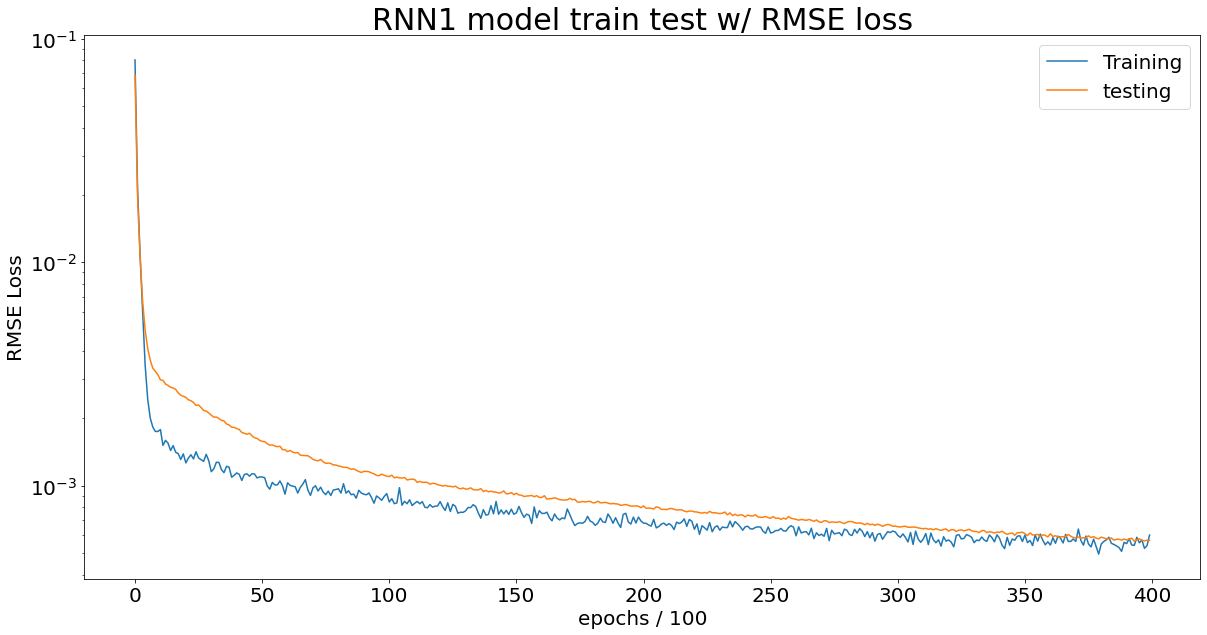

In [140]:
model1 = RNN1(hidden_state=100).to(device)

opt = torch.optim.SGD(model1.parameters(), lr=0.0001)
lossfn = RMSELoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=1)

stats = train(
    model1,
    (ds_train, ds_test),
    opt,
    scheduler,
    lossfn,
    NUM_EPOCHS,
    device,
    STAT_INTERVAL,
    BATCH_SIZE,
)

# semi-manual long-term multi-stage training: NO Adam/AdamW, no L1Loss, no LRscheduler
# 1st stage test MAPE: 0.305903 | RMSE train  0.000371730 | test 0.000261407
generalization_plot(stats, "RMSE")

In [142]:
# path = tm_save(model1, "RNN100")
# test MAPE: 0.565462 | RMSE train  0.000601211 | test 0.000568904

test MAPE: 0.418002 | RMSE: 0.000423395:  78%|███████████████████████████▎       | 31200/40000 [27:20<07:42, 19.02it/s]


RMSE train  0.000436348 | test 0.000423395


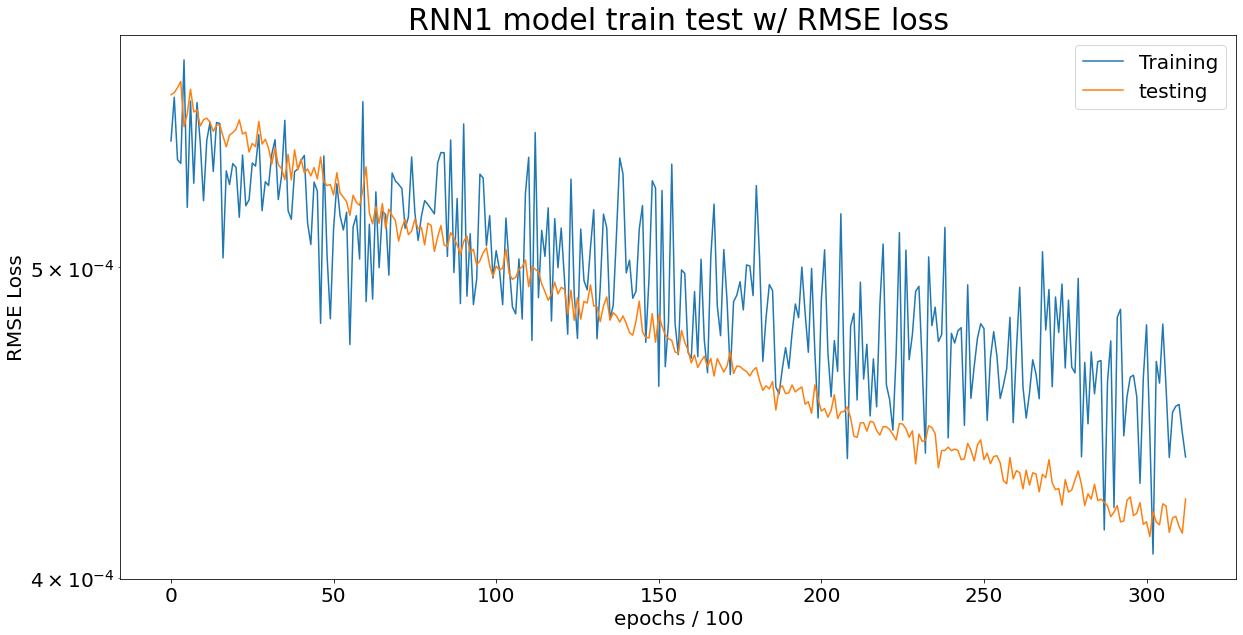

In [143]:
# path = "./nn/RNN100.pth"
# model1_cont = RNN1(hidden_state=100).to(device)
# change lr of current optimizer (optional)
# tm_load(model1_cont, path)
# opt_cont = torch.optim.SGD(model1_cont.parameters(), lr=0.0001, momentum=0.2)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(opt_cont, gamma=1)
# lossfn = RMSELoss()
# opt.param_groups[0]["lr"] = 0.0001

# continue training
stats = train(
    model1,
    (ds_train, ds_test),
    opt,
    scheduler,
    lossfn,
    NUM_EPOCHS,
    device,
    STAT_INTERVAL,
    BATCH_SIZE,
)
generalization_plot(stats, "RMSE")

In [144]:
# path = tm_save(model1, "RNN100")
# test MAPE: 0.418002 | RMSE train  0.000436348 | test 0.000423395
# tm_load(model1_cont, path)
# model1 = model1_cont

test MAPE: 0.328383 | RMSE: 6.66517e-08:  25%|████████▊                          | 10000/40000 [14:44<44:13, 11.31it/s]


RMSE train  0.000000043 | test 0.000000067


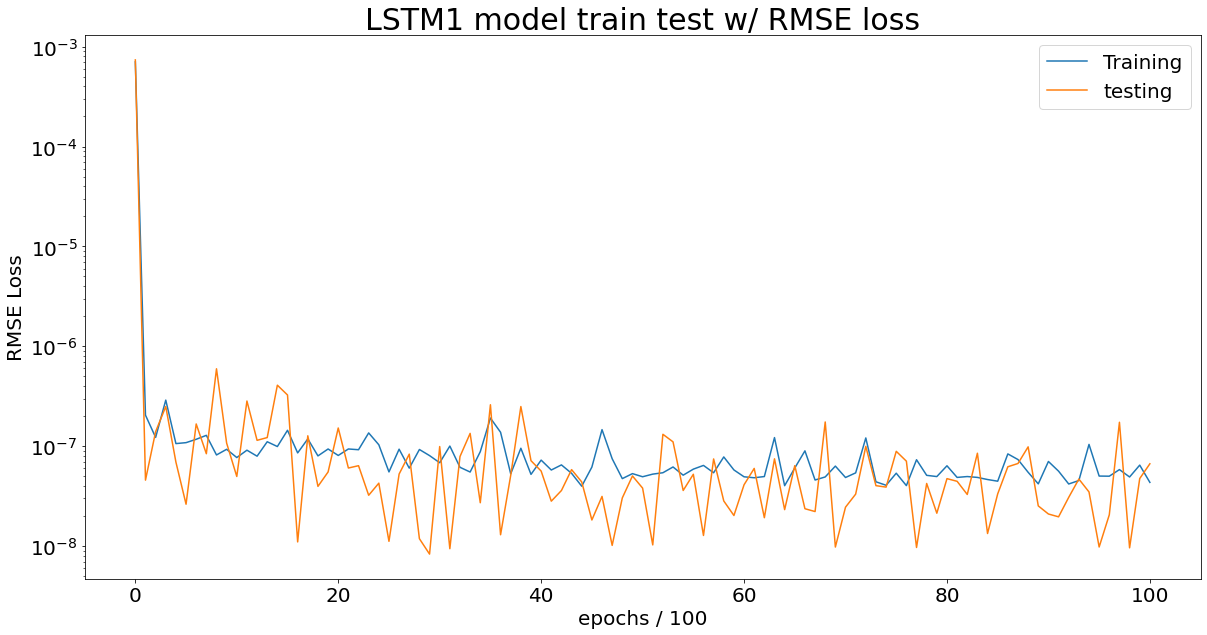

In [145]:
NUM_EPOCHS = 40000
model2 = LSTM1(hidden_state=50, rec_layers=2, hidden_layer=25).to(device)
# opt = torch.optim.SGD(model2.parameters(), lr=0.01, momentum=0.2)
opt = torch.optim.AdamW(model2.parameters(), weight_decay=1e-5)
# lossfn = nn.L1Loss()
lossfn = nn.MSELoss()

# LR decays each epoch by gamma
scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.999999)

stats = train(
    model2,
    (ds_train, ds_test),
    opt,
    scheduler,
    lossfn,
    NUM_EPOCHS,
    device,
    STAT_INTERVAL,
    BATCH_SIZE,
)
# BEST LSTM MAPE test: 0.37905 | MSE | train loss 0.000000033 | test loss 0.000000069
generalization_plot(stats, "RMSE")

In [146]:
# path = tm_save(model2, "LSTM2x50+FCN25")
# test MAPE: 0.328383 | RMSE train  0.000000043 | test 0.000000067

test MAPE: 0.262574 | RMSE: 4.4578e-08:  25%|█████████                           | 10100/40000 [14:59<44:21, 11.23it/s]

RMSE train  0.000000049 | test 0.000000045


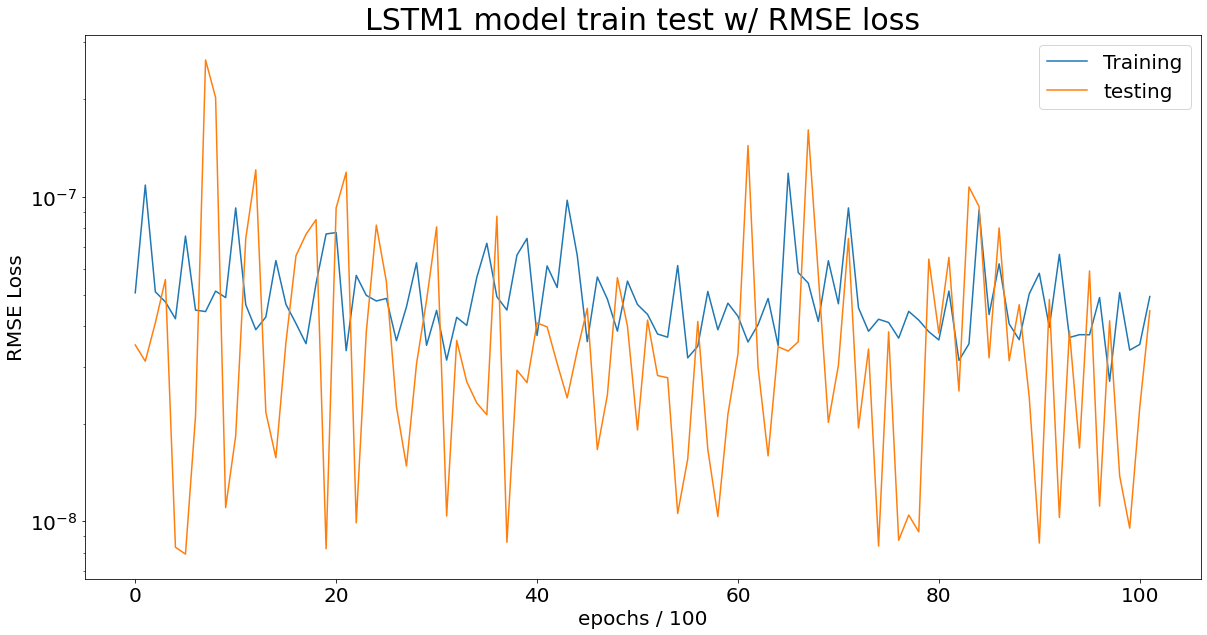

In [147]:
# model2_cont = LSTM1(hidden_state=50, rec_layers=2, hidden_layer=30).to(device)
# tm_load(model2_cont, path)
# opt_cont = torch.optim.SGD(model2_cont.parameters(), lr=0.0001)

stats = train(
    model2,
    (ds_train, ds_test),
    opt,
    scheduler,
    lossfn,
    NUM_EPOCHS,
    device,
    STAT_INTERVAL,
    BATCH_SIZE,
)
generalization_plot(stats, "RMSE")

In [148]:
# path = tm_save(model2, "LSTM2x50+FCN25")
# test MAPE: 0.262574 | RMSE train  0.000000049 | test 0.000000045

test MAPE: 0.137255 | RMSE: 1.42366e-08: 100%|█████████████████████████████████████| 3000/3000 [04:31<00:00, 11.07it/s]


RMSE train  0.000000037 | test 0.000000014


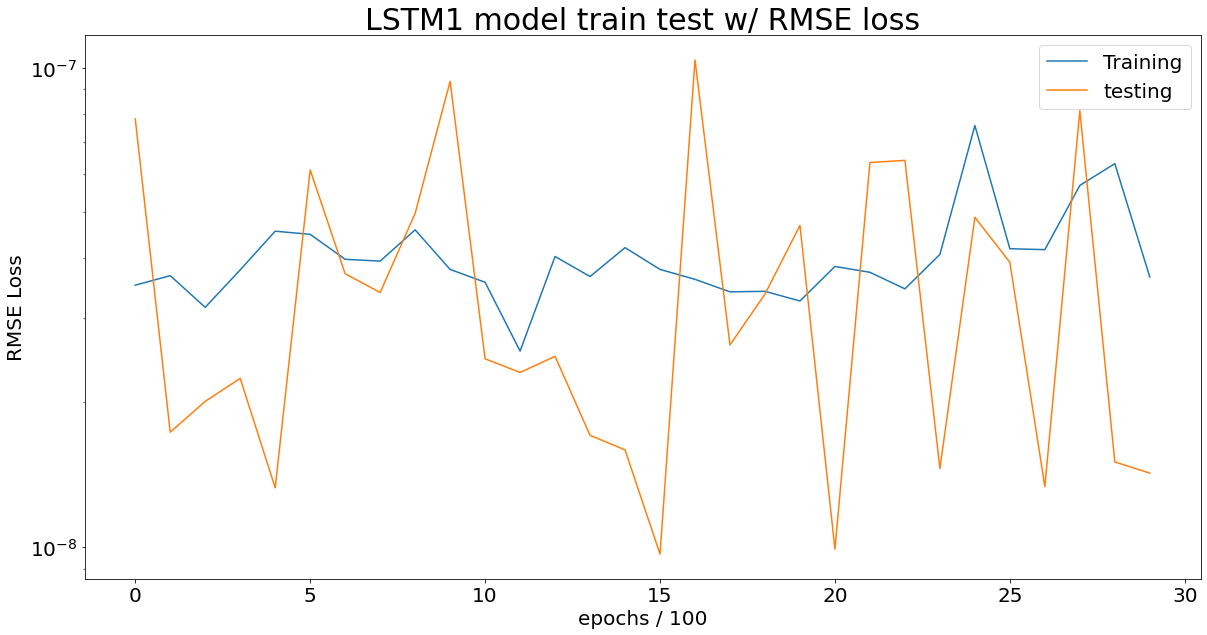

In [151]:
stats = train(
    model2,
    (ds_train, ds_test),
    opt,
    scheduler,
    lossfn,
    3000,
    device,
    STAT_INTERVAL,
    BATCH_SIZE,
)
generalization_plot(stats, "RMSE")

In [153]:
# path = tm_save(model2, "LSTM2x50+FCN25")
# test MAPE: 0.137255 | RMSE train  0.000000037 | test 0.000000014

Check if train mode still on: False


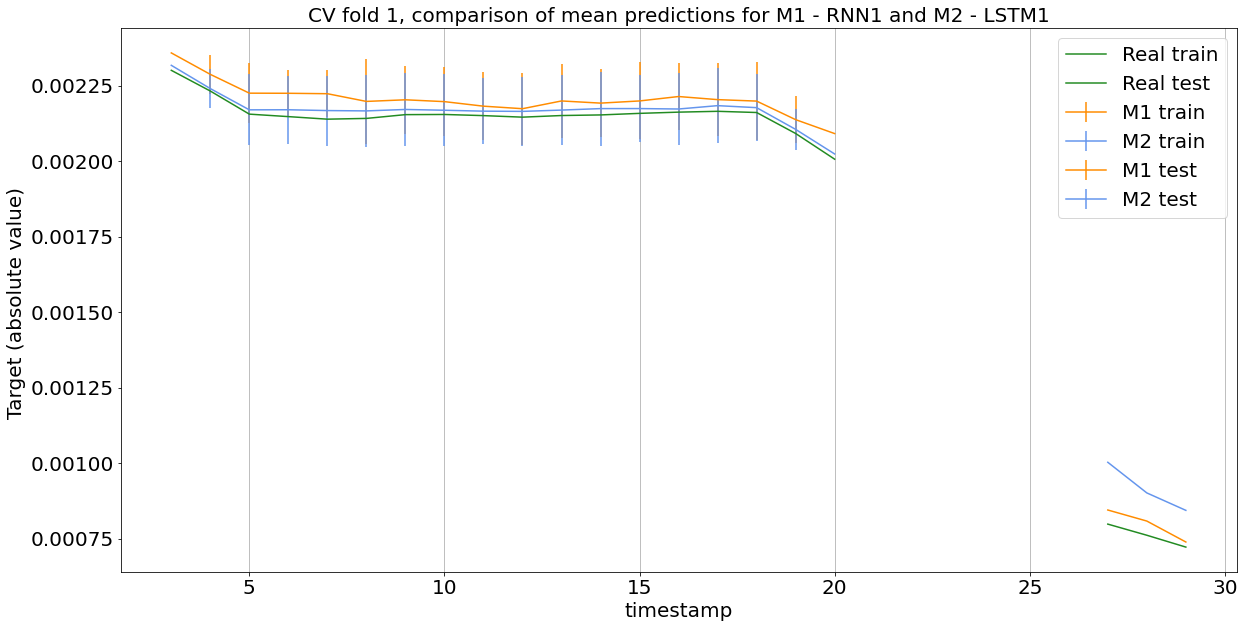

In [154]:
nns = compare_models(
    model1,
    model2,
    ds_train,
    ds_test,
    f"CV fold {CV_FOLD}, comparison of mean predictions for M1 - {model1.__class__.__name__} and M2 - {model2.__class__.__name__}",
)

test MAPE: 0.234662 | RMSE: 4.12648e-08:  25%|████████▊                          | 10100/40000 [12:15<36:17, 13.73it/s]


RMSE train  0.000000059 | test 0.000000041


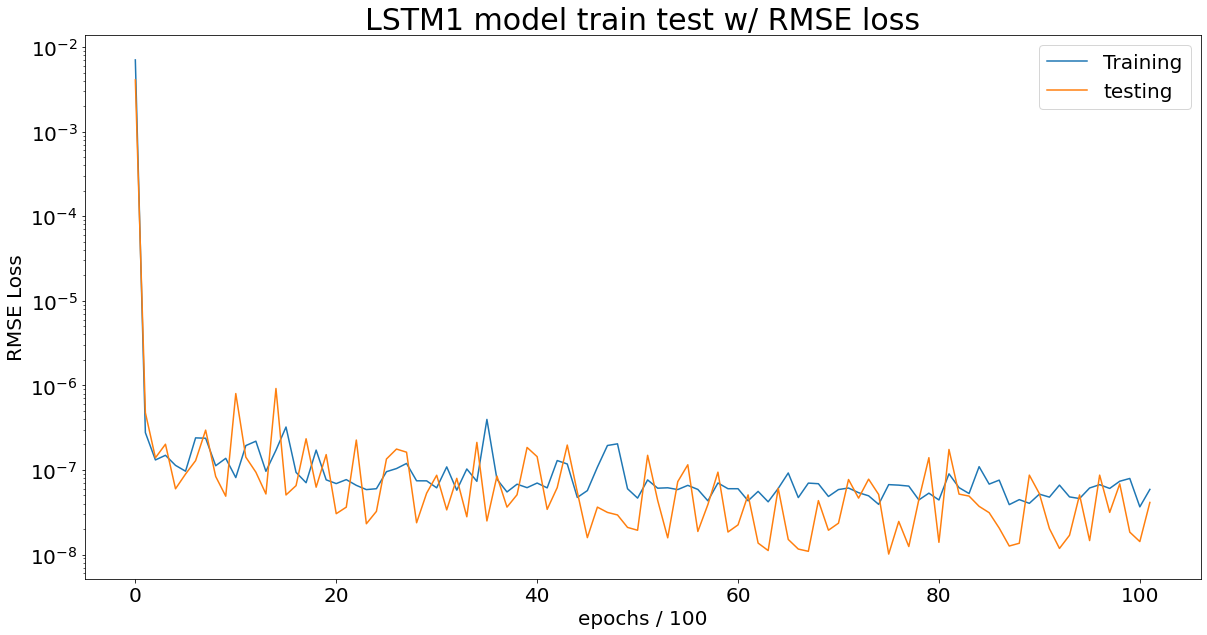

In [180]:
model3 = LSTM1(hidden_state=100, rec_layers=1, hidden_layer=15).to(device)
# opt = torch.optim.SGD(model2.parameters(), lr=0.01, momentum=0.2)
opt = torch.optim.AdamW(model3.parameters(), weight_decay=1e-5)
# lossfn = nn.L1Loss()
lossfn = nn.MSELoss()

# LR decays each epoch by gamma
scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=1)

stats = train(
    model3,
    (ds_train, ds_test),
    opt,
    scheduler,
    lossfn,
    NUM_EPOCHS,
    device,
    STAT_INTERVAL,
    BATCH_SIZE,
)
# BEST LSTM MAPE test: 0.37905 | MSE | train loss 0.000000033 | test loss 0.000000069
generalization_plot(stats, "RMSE")

In [182]:
# path = tm_save(model3, "LSTM100+FCN15")
# test MAPE: 0.234662 | RMSE train  0.000000059 | test 0.000000041

test MAPE: 0.107718 | RMSE: 1.26701e-08: 100%|███████████████████████████████████| 10000/10000 [12:04<00:00, 13.80it/s]


RMSE train  0.000000044 | test 0.000000013


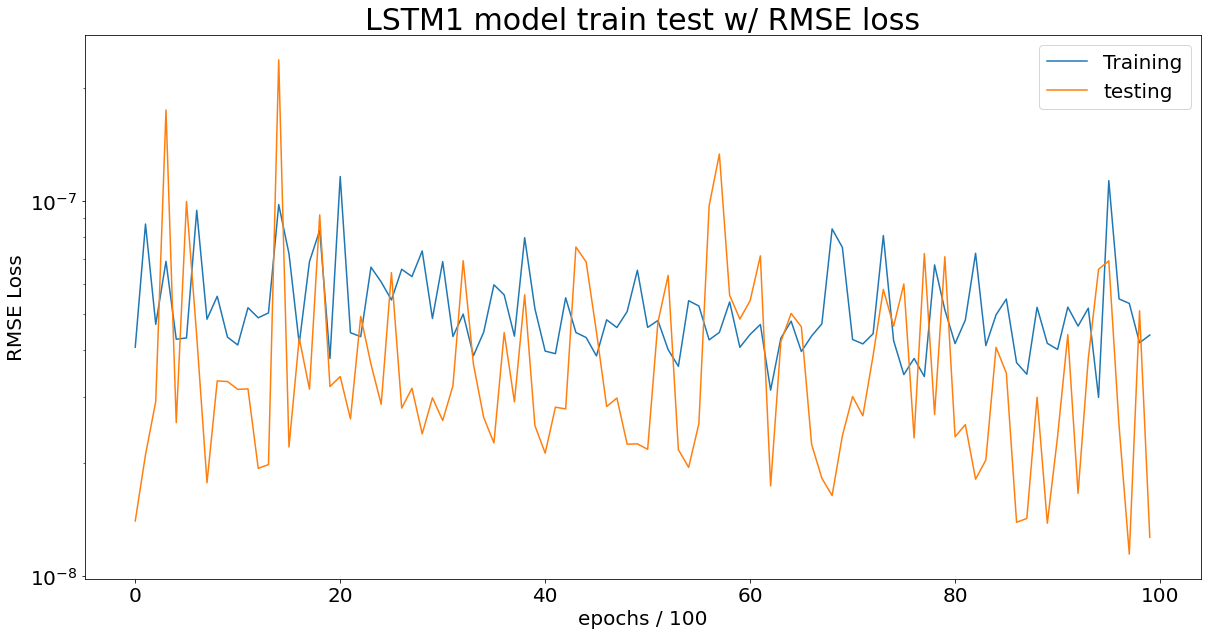

In [183]:
stats = train(
    model3,
    (ds_train, ds_test),
    opt,
    scheduler,
    lossfn,
    10000,
    device,
    STAT_INTERVAL,
    BATCH_SIZE,
)
generalization_plot(stats, "RMSE")

In [184]:
# path = tm_save(model3, "LSTM100+FCN15")
# test MAPE: 0.107718 | RMSE train  0.000000044 | test 0.000000013

In [85]:
# Loading state dict to models, then the models and dataset both to CPU (BN causes issues with wrong device)
device = "cpu"
path = "./nn/RNN100.pth"
model1_c = RNN1(hidden_state=100).to(device)
model1_c.eval()
tm_load(model1_c, path)
path = "./nn/LSTM2x50+FCN25.pth"
model2_c = LSTM1(hidden_state=50, rec_layers=2, hidden_layer=25).to(device)
model2_c.eval()
tm_load(model2_c, path)
path = "./nn/LSTM100+FCN15.pth"
model3_c = LSTM1(hidden_state=100, rec_layers=1, hidden_layer=15).to(device)
model3_c.eval()
tm_load(model3_c, path)
ds_train = OilSequence(D_cv[CV_FOLD][0], N_PAST, N_FUTURE, cuda=device, verbose=False)
ds_test = OilSequence(
    D_cv[CV_FOLD][1], N_PAST, N_FUTURE, cuda=device, verbose=False, link=ds_train
)

next(model3_c.parameters()).is_cuda, ds_train[:][0].device

(False, device(type='cpu'))

In [216]:
# Cross-validation for NN

# opt = torch.optim.AdamW(model2.parameters(), weight_decay=1e-3)
# lossfn = nn.MSELoss()
# scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=1)

# TSCV(model2_cont, D_cv, opt, scheduler, lossfn, NUM_EPOCHS//4, device)

Check if train mode still on: False


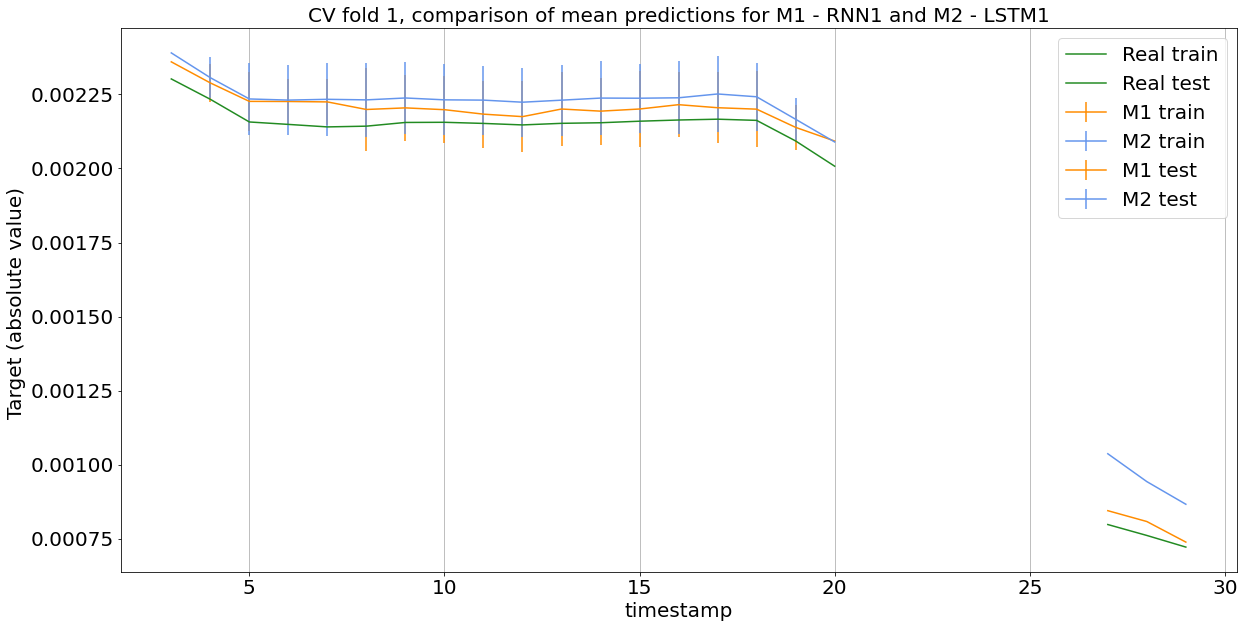

In [256]:
nns2 = compare_models(
    model1,
    model3,
    ds_train,
    ds_test,
    f"CV fold {CV_FOLD}, comparison of mean predictions for M1 - {model1.__class__.__name__} and M2 - {model3.__class__.__name__}",
)

<AxesSubplot:title={'center':'Mean feature importance RNN1 ratio (sorted by Test)'}>

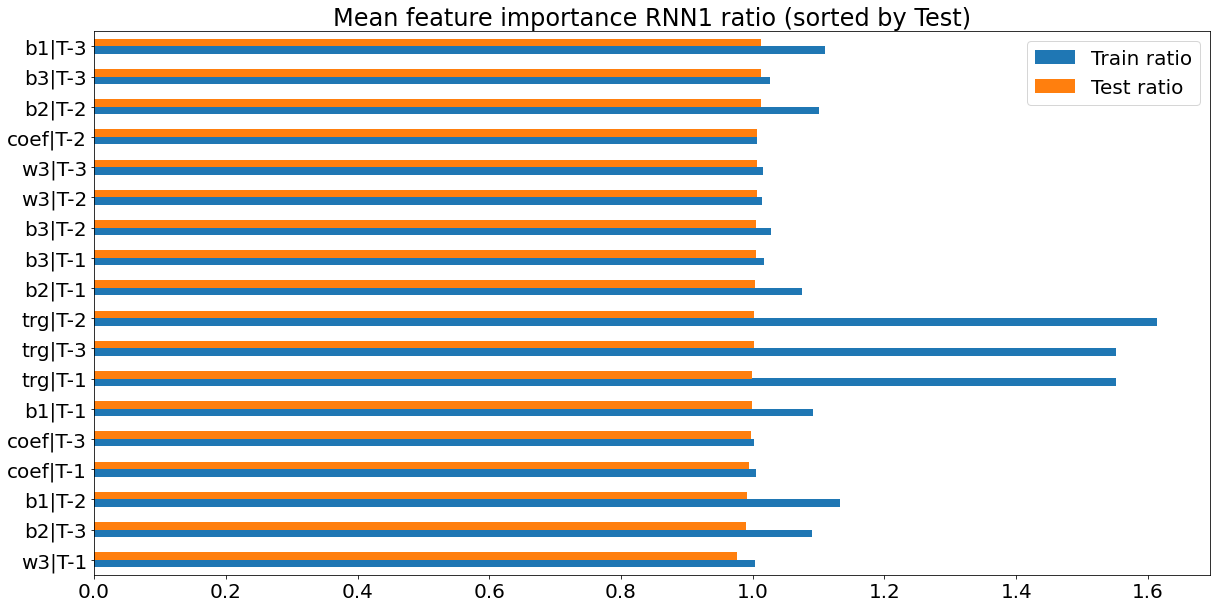

In [271]:
# There does exist a method called permutation importance to check meaningful features for neural networks
# As we can't simpy remove 1 feature, feature importance for NN model = permutation importance
# To compute an importance score, we shuffle (1) feature in orig dataset and evaluate (pre-trained) model 
# with RMSE over BOTH SETS, then calculate a ratio shuffled/normal lossfor each feature (3Tx6F)
metric_importance = RMSELoss()
# {metric_importance.__name__}
# mean_absolute_percentage_error

f_importance_total(model1, D_cv[CV_FOLD], metric_importance, device=device).sort_values(
    "Test ratio"
).plot(
    kind="barh",
    title=f"Mean feature importance {model1.__class__.__name__} ratio (sorted by Test)",
    figsize=(20, 10),
)

<AxesSubplot:title={'center':'Mean feature importance LSTM1 100x1+15 ratio'}>

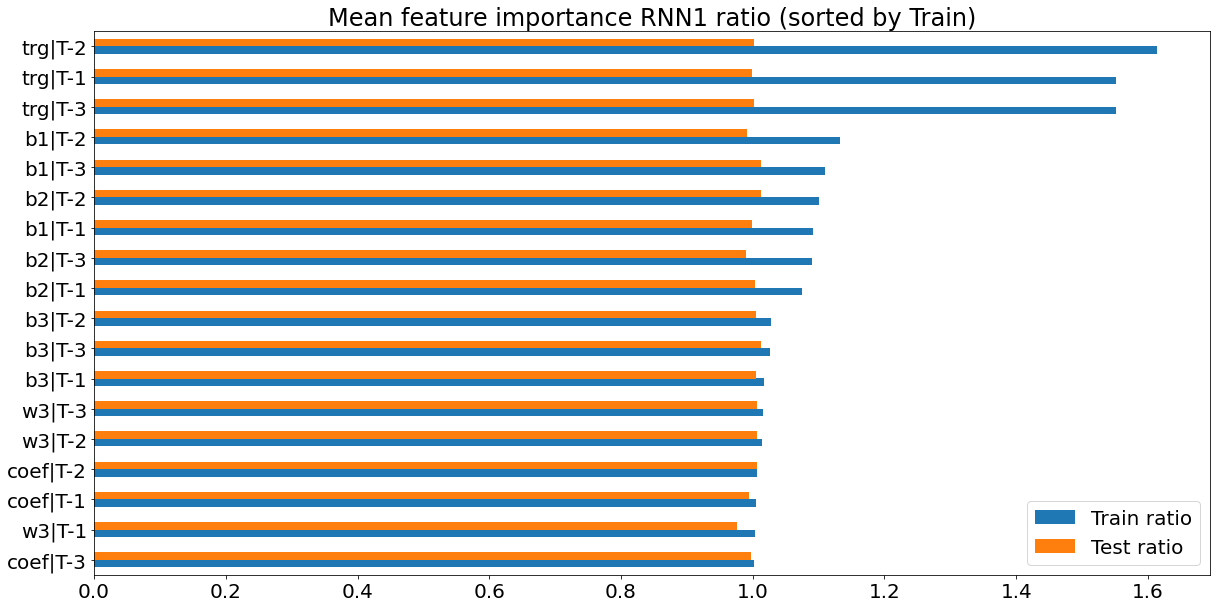

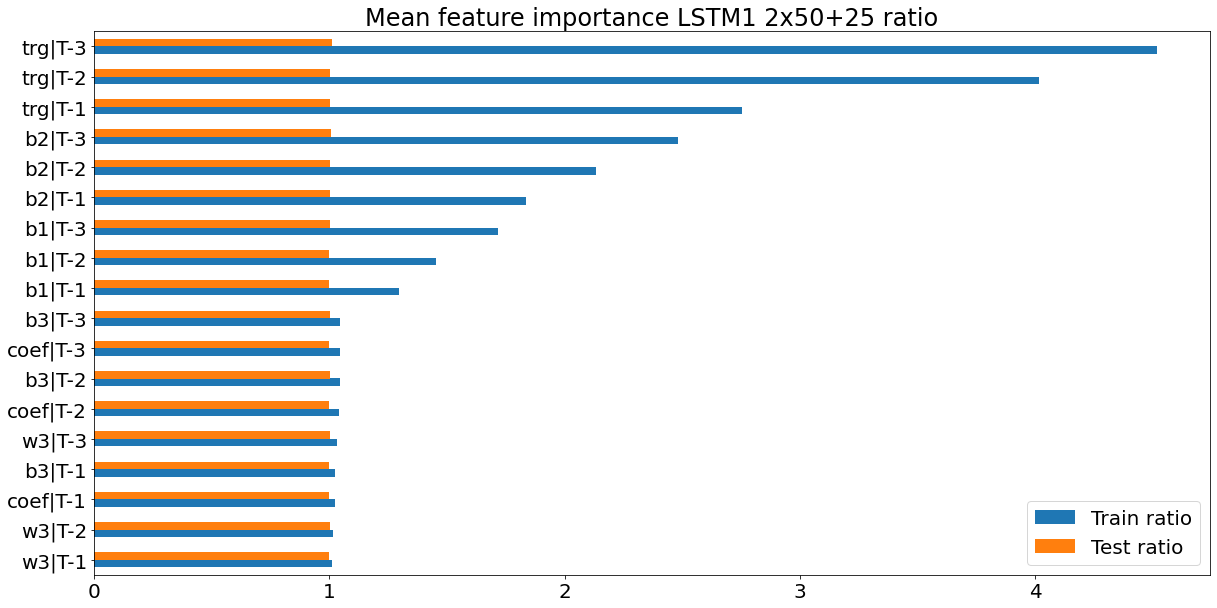

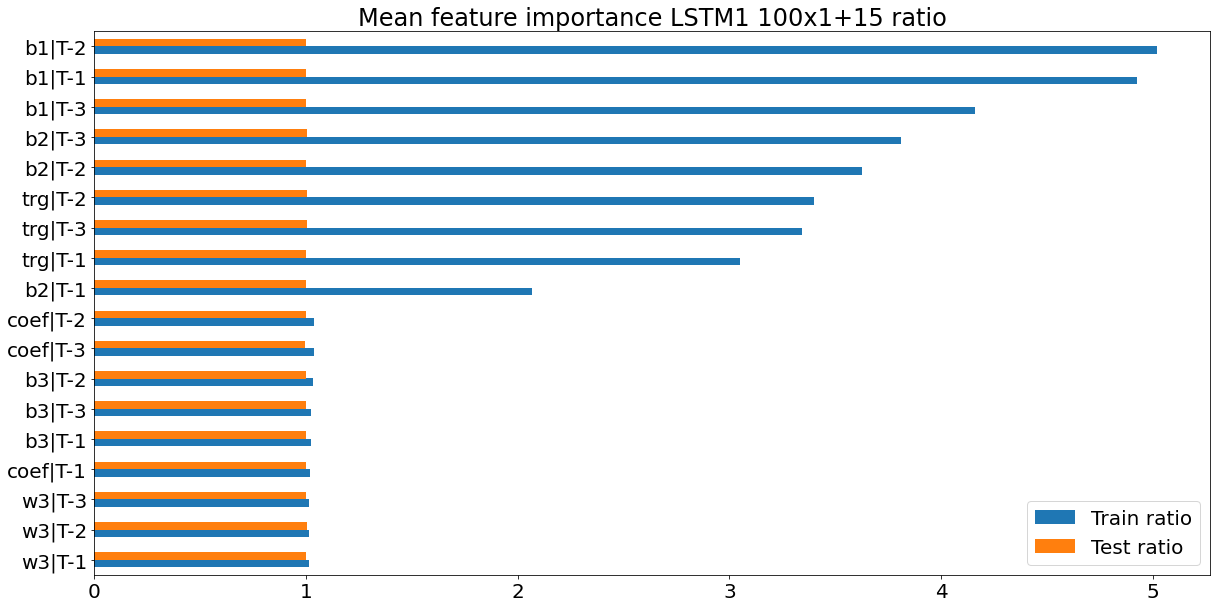

In [272]:
f_importance_total(model1, D_cv[CV_FOLD], metric_importance, device=device).sort_values(
    "Train ratio"
).plot(
    kind="barh",
    title=f"Mean feature importance {model1.__class__.__name__} ratio (sorted by Train)",
    figsize=(20, 10),
)
f_importance_total(model2, D_cv[CV_FOLD], metric_importance, device=device).sort_values(
    "Train ratio"
).plot(
    kind="barh",
    title=f"Mean feature importance {model2.__class__.__name__} 2x50+25 ratio",
    figsize=(20, 10),
)
f_importance_total(model3, D_cv[CV_FOLD], metric_importance, device=device).sort_values(
    "Train ratio"
).plot(
    kind="barh",
    title=f"Mean feature importance {model3.__class__.__name__} 100x1+15 ratio",
    figsize=(20, 10),
)

In [265]:
# !pip3 install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


def RMSE(preds, tar):
    """just for a shorter name string"""
    return mean_squared_error(preds, tar, multioutput="raw_values", squared=False)

In [157]:
reg = xgb.XGBRegressor(learning_rate=0.001, n_jobs=16, eval_metric="rmse")

# same dataset, the only difference is that this XGBoost requires 2D matrices as input and uses numpy (=>CPU)
X_train = ds_train[:][0].cpu().numpy().reshape(len(ds_train), -1)
y_train = ds_train[:][1].cpu().numpy().reshape(len(ds_train), -1)
X_test = ds_test[:][0].cpu().numpy().reshape(len(ds_test), -1)
y_test = ds_test[:][1].cpu().numpy().reshape(len(ds_test), -1)
# print(ds_train.orig_shape, ds_train[:][1].shape)
eval_on = [(X_train, y_train), (X_test, y_test)]

In [158]:
# parameter grid for gridsearch
opt_parameters = {
    "min_child_weight": [1, 2, 5, 6],
    "gamma": [0, 0.01],
    "subsample": [0.9, 1.0],
    "max_depth": [4, 5, 6],
    "early_stopping_rounds": [25, 50, 100],
    "n_estimators": [5000, 10000, 15000, 20000],
}
# parameters to be passed to fit method (directly)
fit_parameters = {"eval_set": eval_on, "verbose": 0}

# i am intentionally trying to lower MAE via gridsearch (despite i use rmse as my main metric)
random_search = RandomizedSearchCV(
    reg,
    param_distributions=opt_parameters,
    n_iter=10,
    scoring="neg_mean_absolute_error",
    n_jobs=16,
    verbose=3,
    cv=2,
    random_state=RSEED,
)
# random_search.fit(X_train, y_train, **fit_parameters)
# optimal_cfg = random_search.best_params_
# optimal_cfg

Fitting 2 folds for each of 10 candidates, totalling 20 fits


{'subsample': 1.0,
 'n_estimators': 15000,
 'min_child_weight': 6,
 'max_depth': 4,
 'gamma': 0,
 'early_stopping_rounds': 25}

In [159]:
optimal_cfg_saved = {
    "subsample": 1.0,
    "n_estimators": 15000,
    "min_child_weight": 6,
    "max_depth": 4,
    "gamma": 0,
    "early_stopping_rounds": 25,
}
reg = xgb.XGBRegressor(
    learning_rate=0.001, n_jobs=16, eval_metric="rmse", **optimal_cfg_saved
)
reg.fit(X=X_train, y=y_train, eval_set=eval_on, verbose=1000)
# best: validation_0-rmse:0.00017	validation_1-rmse:0.00029

[0]	validation_0-rmse:0.49735	validation_1-rmse:0.49874
[1000]	validation_0-rmse:0.18293	validation_1-rmse:0.18433
[2000]	validation_0-rmse:0.06729	validation_1-rmse:0.06868
[3000]	validation_0-rmse:0.02476	validation_1-rmse:0.02587
[4000]	validation_0-rmse:0.00911	validation_1-rmse:0.00990
[5000]	validation_0-rmse:0.00336	validation_1-rmse:0.00394
[6000]	validation_0-rmse:0.00125	validation_1-rmse:0.00169
[7000]	validation_0-rmse:0.00049	validation_1-rmse:0.00085
[8000]	validation_0-rmse:0.00025	validation_1-rmse:0.00055
[9000]	validation_0-rmse:0.00020	validation_1-rmse:0.00044
[10000]	validation_0-rmse:0.00019	validation_1-rmse:0.00041
[11000]	validation_0-rmse:0.00019	validation_1-rmse:0.00039
[12000]	validation_0-rmse:0.00019	validation_1-rmse:0.00039
[13000]	validation_0-rmse:0.00019	validation_1-rmse:0.00038
[14000]	validation_0-rmse:0.00019	validation_1-rmse:0.00038
[14999]	validation_0-rmse:0.00019	validation_1-rmse:0.00038


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=25,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             n_estimators=15000, n_jobs=16, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

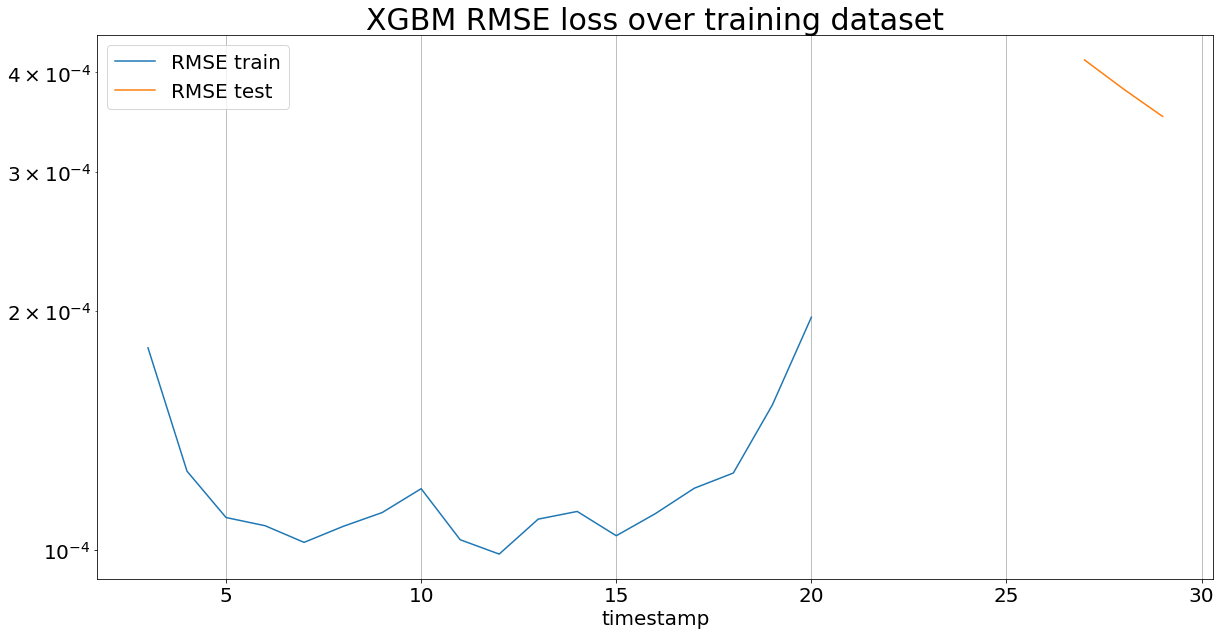

In [160]:
xgbloss = plot_predictions(reg, ds_train, ds_test, stats=RMSE)

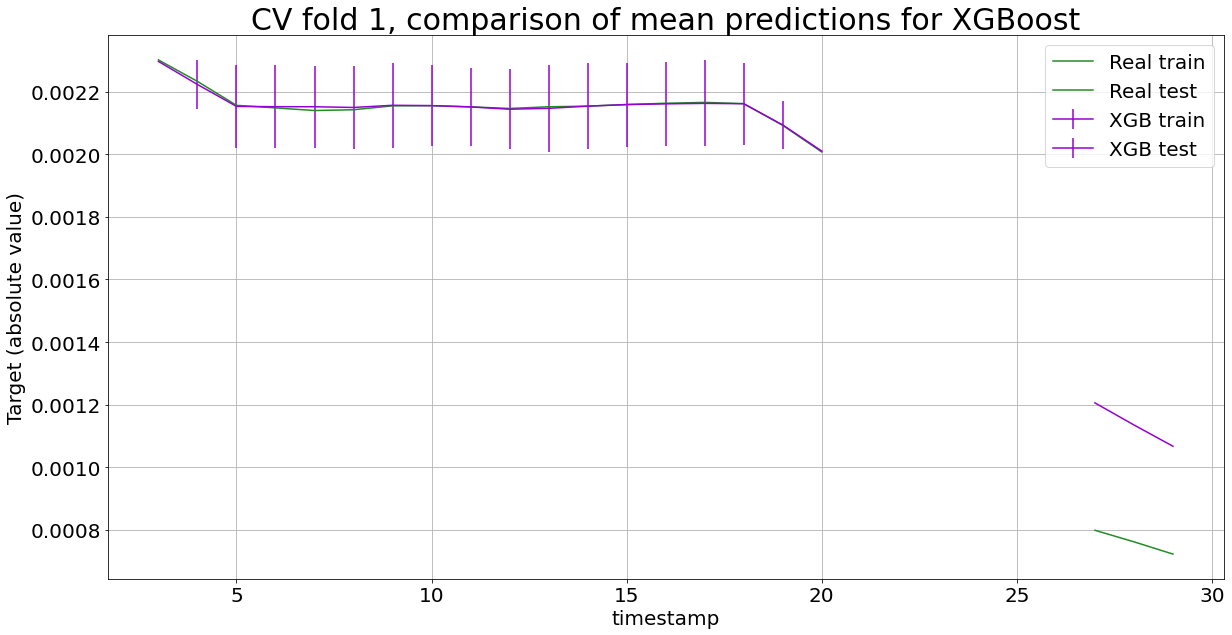

In [161]:
xgbcomp = plot_predictions(
    reg,
    ds_train,
    ds_test,
    f"CV fold {CV_FOLD}, comparison of mean predictions for XGBoost",
)

<AxesSubplot:title={'center':'Mean feature importance'}>

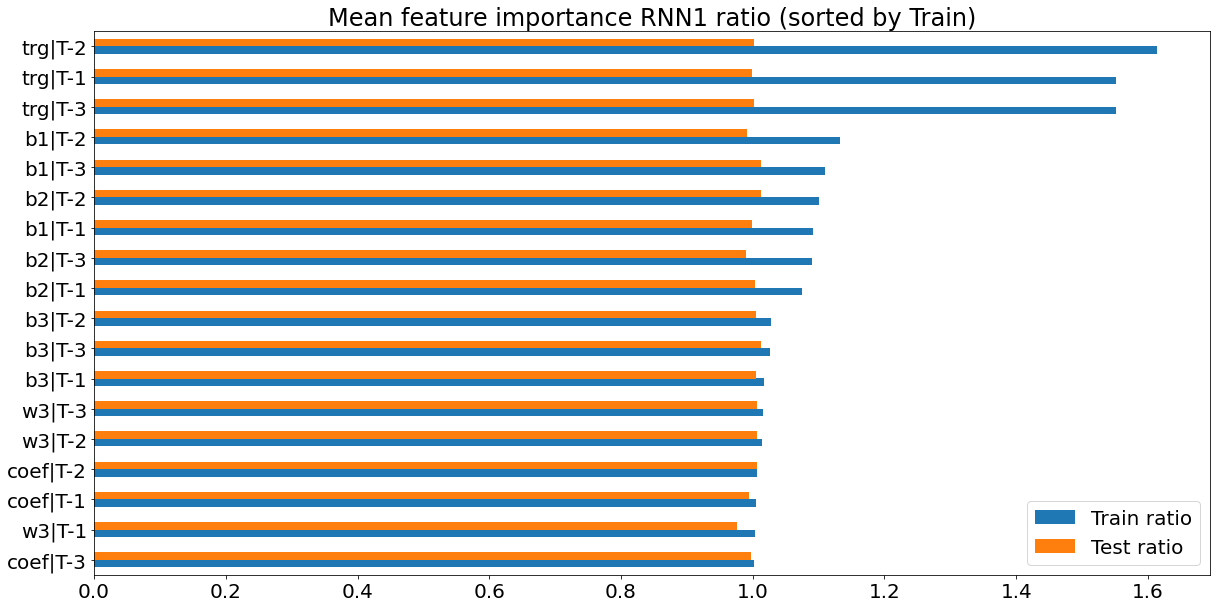

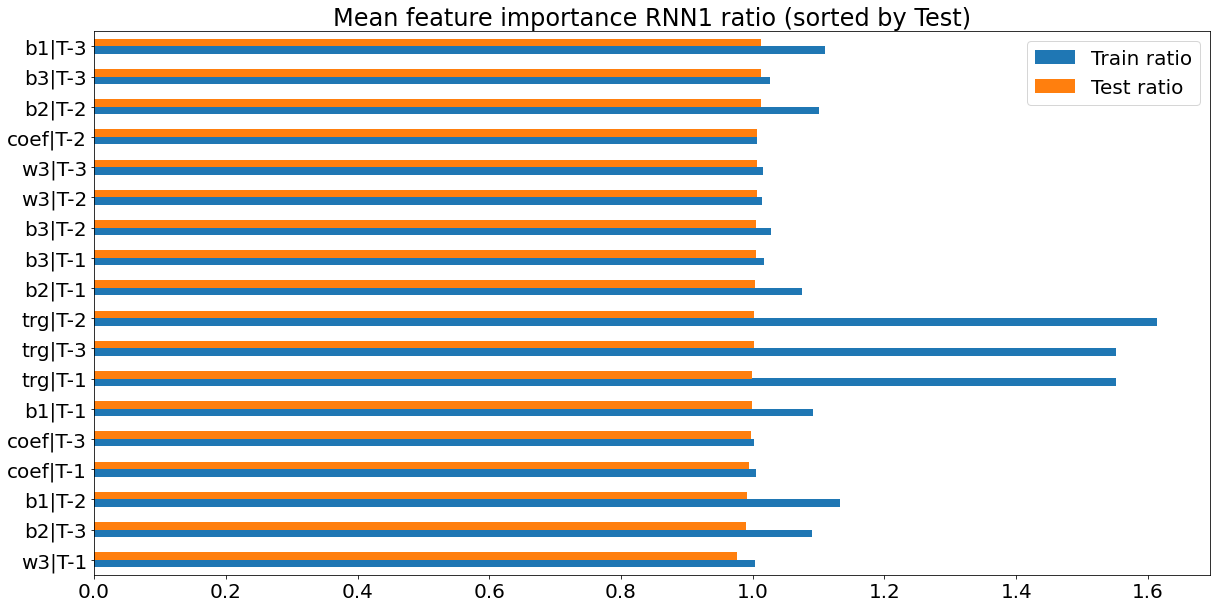

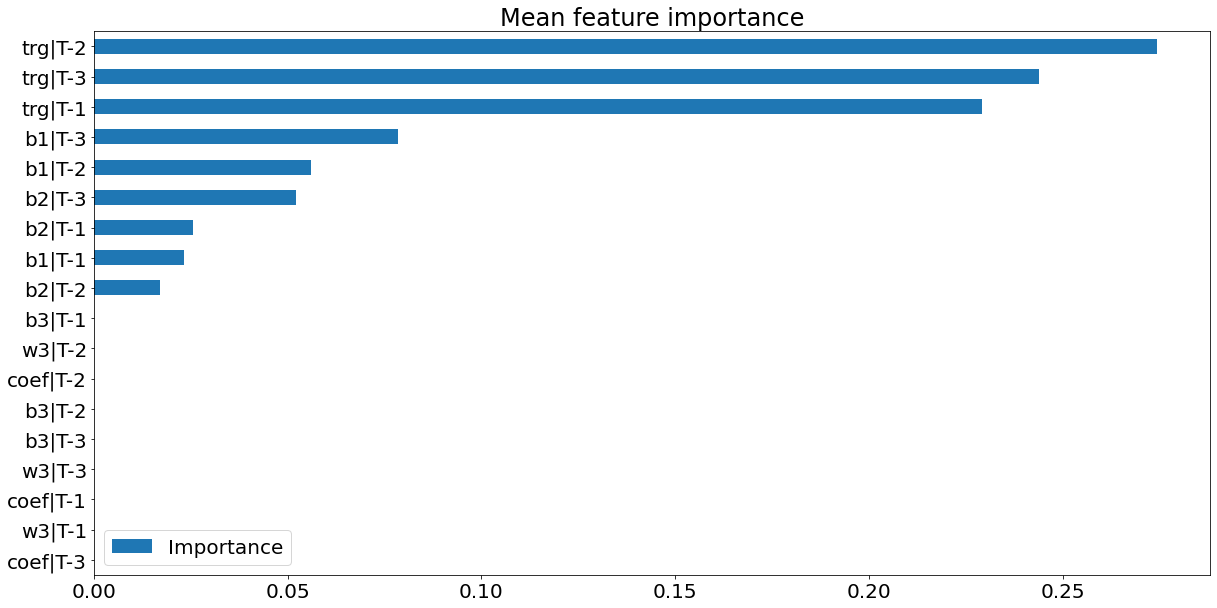

In [268]:
# Feature importance bar plot

f_importance_total(model1, D_cv[CV_FOLD], metric_importance, device=device).sort_values(
    "Train ratio"
).plot(
    kind="barh",
    title=f"Mean feature importance {model1.__class__.__name__} ratio (sorted by Train)",
    figsize=(20, 10),
)

labels = [get_old_f(id)[1] for id in range(N_PAST * NF_ORIG)]
# create a dataframe with their (mean) importance
features_i = pd.DataFrame(
    data=reg.feature_importances_.flatten(), index=labels, columns=["Importance"]
)
# sort by importance and plot
features_i.sort_values("Importance").plot(
    kind="barh", title="Mean feature importance", figsize=(20, 10)
)
# df_.describe()
# df_

In [164]:
def TSCV_boost(model, list_of_splits):
    """time-series CV for gradient boosting"""
    train_CV, test_CV = [], []
    folds_iter = tqdm(enumerate(list_of_splits))
    folds_iter.set_description(f"Starting...")
    for fold, split in folds_iter:
        # create CV sets
        ds_train = OilSequence(split[0], N_PAST, N_FUTURE, verbose=True)
        ds_test = OilSequence(split[1], N_PAST, N_FUTURE, verbose=True, link=ds_train)
        # __get__ everything from torch DataSet class then index and move onto CPU
        X_train = ds_train[:][0].cpu().numpy().reshape(len(ds_train), -1)
        y_train = ds_train[:][1].cpu().numpy().reshape(len(ds_train), -1)
        X_test = ds_test[:][0].cpu().numpy().reshape(len(ds_test), -1)
        y_test = ds_test[:][1].cpu().numpy().reshape(len(ds_test), -1)
        eval_on = [(X_train, y_train), (X_test, y_test)]
        model.fit(X=X_train, y=y_train, eval_set=eval_on, verbose=10000)
        # predict, retain original shape
        predicted_train = reg.predict(X_train).reshape(y_train.shape).squeeze()
        predicted_test = reg.predict(X_test).reshape(y_test.shape).squeeze()
        real_train = y_train.squeeze()
        real_test = y_test.squeeze()
        # calculate stats (INVERSE ORDER, real THEN predicted)
        RMSE_train = mean_squared_error(real_train, predicted_train, squared=False)
        RMSE_test = mean_squared_error(real_test, predicted_test, squared=False)
        MAPE_train = mean_absolute_percentage_error(real_train, predicted_train)
        MAPE_test = mean_absolute_percentage_error(real_test, predicted_test)
        R2_train = r2_score(real_train, predicted_train)
        R2_test = r2_score(real_test, predicted_test)
        # last values for train and test loss in this fold
        train_CV.append((RMSE_train, MAPE_train, R2_train))
        test_CV.append((RMSE_test, MAPE_test, R2_test))
        folds_iter.set_description(
            f"CV Fold {fold} results: train {split[0].shape[1]} RMSE {RMSE_train:.04f} | test {split[1].shape[1]} RMSE {RMSE_test:.04f}",
            refresh=True,
        )
    train_CV, test_CV = np.asarray(train_CV), np.asarray(test_CV)
    CV_train_RMSE, CV_test_RMSE = (
        np.mean(train_CV[:, 0]).item(),
        np.mean(test_CV[:, 0]).item(),
    )
    CV_train_MAPE, CV_test_MAPE = (
        np.mean(train_CV[:, 1]).item(),
        np.mean(test_CV[:, 1]).item(),
    )
    CV_train_R2, CV_test_R2 = (
        np.mean(train_CV[:, 2]).item(),
        np.mean(test_CV[:, 2]).item(),
    )
    print(
        f"Mean {len(list_of_splits)}-fold CV RMSE train {CV_train_RMSE:.09f} | test {CV_test_RMSE:.09f} \nMean {len(list_of_splits)}-fold CV MAPE train {CV_train_MAPE:.09f} | test {CV_test_MAPE:.09f}\nMean {len(list_of_splits)}-fold CV R2sc train {CV_train_R2:.09f} | test {CV_test_R2:.09f}"
    )
    # return train_CV, test_CV

In [165]:
TSCV_boost(reg, D_cv)

Starting...: : 0it [00:00, ?it/s]

time series interval of 12 has been reshaped into 7 consequent (XXX|yyy) chunk(s) 
time series interval of 9 has been reshaped into 4 consequent (XXX|yyy) chunk(s) 
[0]	validation_0-rmse:0.49649	validation_1-rmse:0.49832
[10000]	validation_0-rmse:0.00022	validation_1-rmse:0.00189
[14999]	validation_0-rmse:0.00022	validation_1-rmse:0.00187


CV Fold 0 results: train 12 RMSE 0.0002 | test 9 RMSE 0.0019: : 1it [00:11, 11.05s/it]

time series interval of 21 has been reshaped into 16 consequent (XXX|yyy) chunk(s) 
time series interval of 9 has been reshaped into 1 consequent (XXX|yyy) chunk(s) 
[0]	validation_0-rmse:0.49735	validation_1-rmse:0.49874
[10000]	validation_0-rmse:0.00019	validation_1-rmse:0.00041
[14999]	validation_0-rmse:0.00019	validation_1-rmse:0.00038


CV Fold 1 results: train 21 RMSE 0.0002 | test 9 RMSE 0.0004: : 2it [00:26, 13.33s/it]

Mean 2-fold CV RMSE train 0.000203867 | test 0.001123918 
Mean 2-fold CV MAPE train 0.057295168 | test 1.058128446
Mean 2-fold CV R2sc train 0.851706085 | test -99.133225651


<Figure size 1440x720 with 0 Axes>

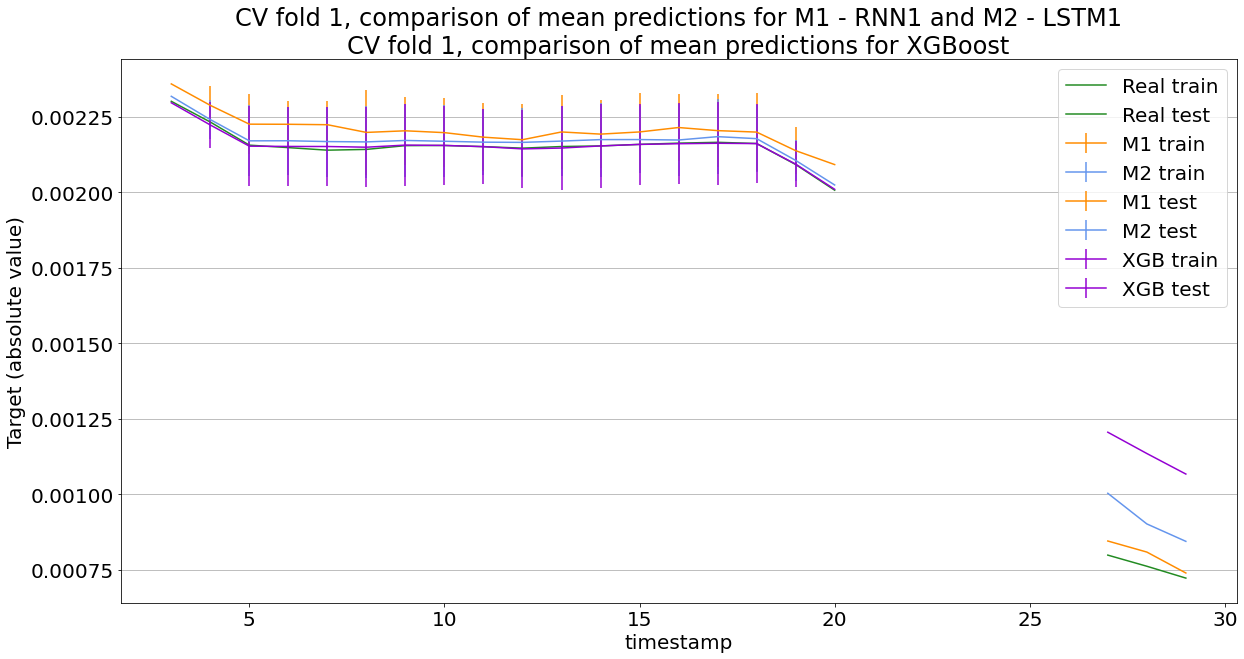

In [162]:
xgbcomp = plot_predictions(
    reg,
    ds_train,
    ds_test,
    f"CV fold {CV_FOLD}, comparison of mean predictions for XGBoost",
    combine=nns,
)
#errorbars represent statistics over bins (each take 3, predict 3 predictions window rolls over time so some forecasts repeat 2-3 times during train)

In [107]:
# Quick effort to beat RNN scores with other architectures

device = "cuda"
ds_train = OilSequence(D_cv[CV_FOLD][0], N_PAST, N_FUTURE, cuda=device, verbose=True)
ds_test = OilSequence(
    D_cv[CV_FOLD][1], N_PAST, N_FUTURE, cuda=device, verbose=True, link=ds_train
)
# Trying to find better architecture and evade overfitting
# 3 layers with L2 reg with higher weight decay
model4 = LSTM1(hidden_state=100, rec_layers=1, hidden_layer=50).to(device)
opt = torch.optim.SGD(model4.parameters(), lr=0.01, momentum=0.05)
# opt = torch.optim.AdamW(model4.parameters(), weight_decay=1e-5)
# opt = torch.optim.Adam(model4.parameters())
# LR decays each epoch by gamma
scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=1)
lossfn = nn.MSELoss()

time series interval of 21 has been reshaped into 16 consequent (XXX|yyy) chunk(s) 
time series interval of 9 has been reshaped into 1 consequent (XXX|yyy) chunk(s) 


test MAPE: 0.771604 | RMSE: 5.19724e-07: 100%|███████████████████████████████████| 40000/40000 [41:04<00:00, 16.23it/s]


RMSE train  0.000000490 | test 0.000000520


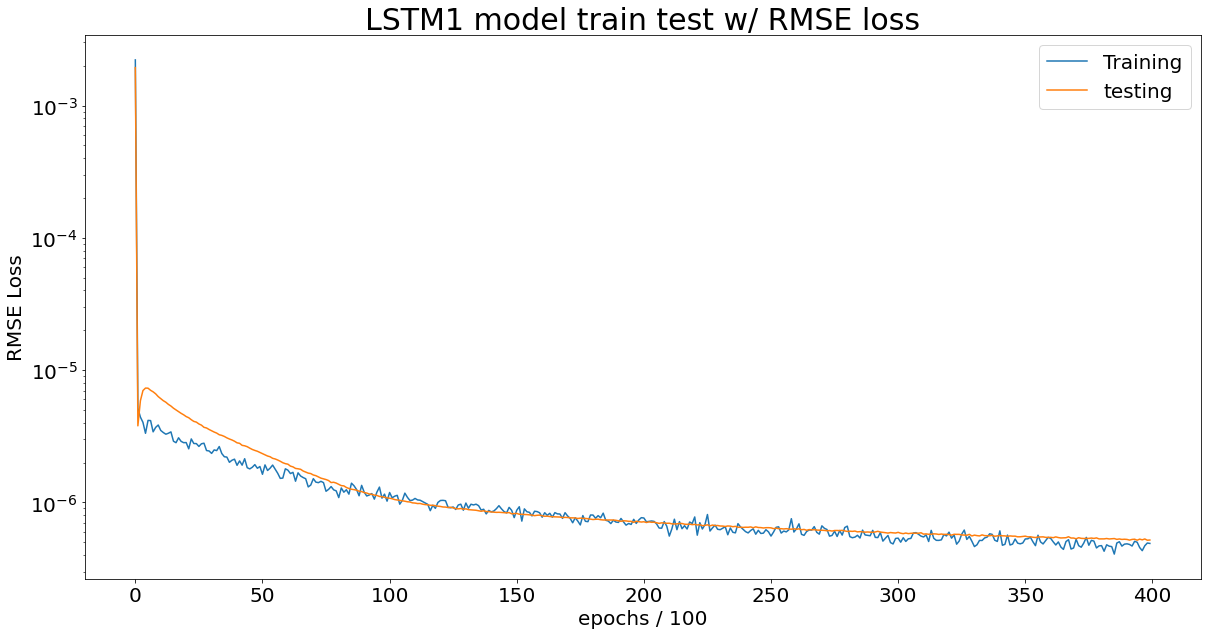

In [97]:
stats = train(
    model4,
    (ds_train, ds_test),
    opt,
    scheduler,
    lossfn,
    NUM_EPOCHS,
    device,
    STAT_INTERVAL,
    BATCH_SIZE,
)

generalization_plot(stats, "RMSE")

test MAPE: 0.770813 | RMSE: 5.18345e-07:  52%|██████████████████▏                | 10400/20000 [10:37<09:48, 16.32it/s]


RMSE train  0.000000485 | test 0.000000518


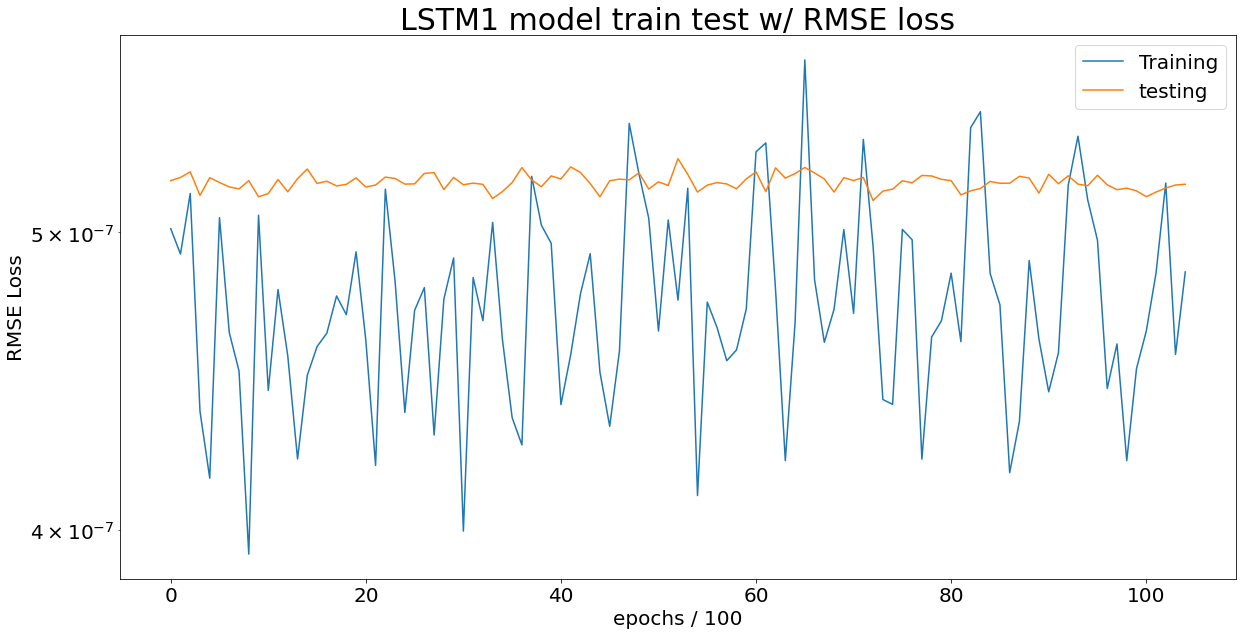

In [101]:
opt.param_groups[0]["lr"] = 0.00001
stats = train(
    model4,
    (ds_train, ds_test),
    opt,
    scheduler,
    lossfn,
    20000,
    device,
    STAT_INTERVAL,
    BATCH_SIZE,
)

generalization_plot(stats, "RMSE")

In [102]:
# path = tm_save(model4, "LSTM2x60+FCN30")
# path = "./nn/LSTM2x60+FCN30.pth"
path = tm_save(model4, "LSTM100+FCN50")

In [103]:
# Loading state dict to models, then the models and dataset both to CPU (BN causes issues with wrong device)
device = "cpu"
model4_c = LSTM1(hidden_state=100, rec_layers=1, hidden_layer=50).to(device)
tm_load(model4_c, path)
model4_c.eval()

LSTM1(
  (bn): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (lstm): LSTM(6, 100, batch_first=True)
  (linear): Linear(in_features=100, out_features=50, bias=True)
  (nl): ReLU()
  (linear2): Linear(in_features=50, out_features=1, bias=True)
)

In [104]:
path = "./nn/RNN100.pth"
model1_c = RNN1(hidden_state=100).to(device)
tm_load(model1_c, path)
model1_c.eval()

RNN1(
  (bn): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (rnn): RNN(6, 100, batch_first=True)
  (linear): Linear(in_features=100, out_features=1, bias=True)
  (nl): Identity()
)

In [105]:
ds_train = OilSequence(D_cv[CV_FOLD][0], N_PAST, N_FUTURE, cuda=device, verbose=False)
ds_test = OilSequence(
    D_cv[CV_FOLD][1], N_PAST, N_FUTURE, cuda=device, verbose=False, link=ds_train
)
next(model4_c.parameters()).is_cuda, ds_train[:][0].device

(False, device(type='cpu'))

Check if train mode still on: False


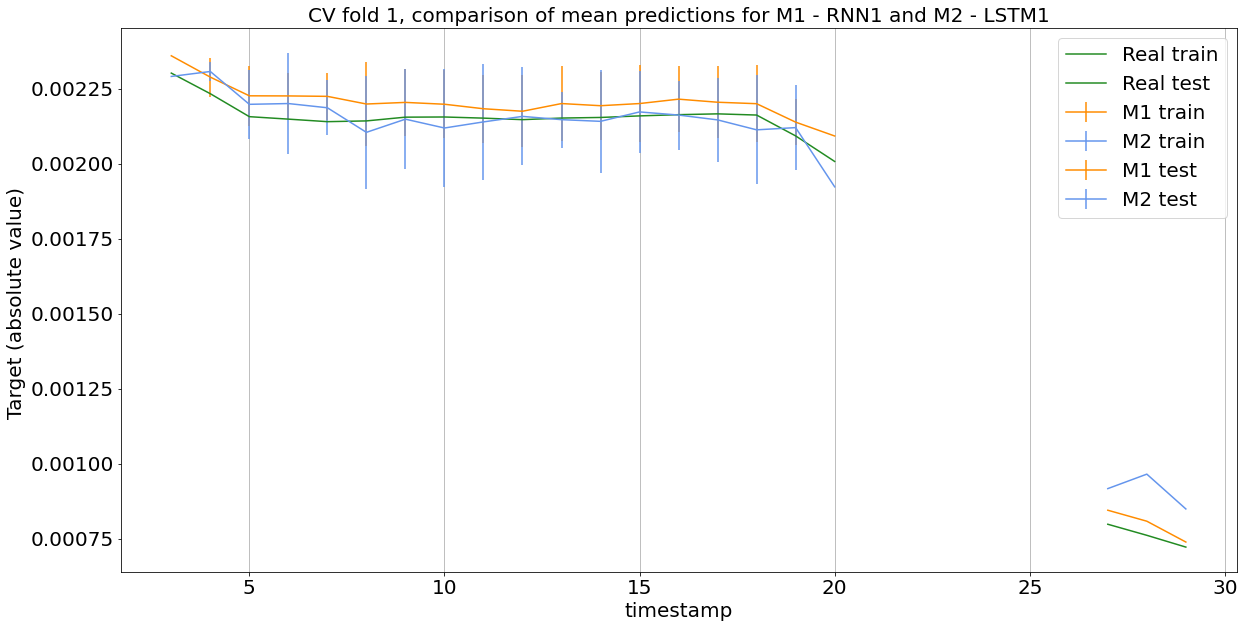

In [106]:
nns2 = compare_models(
    model1_c,
    model4_c,
    ds_train,
    ds_test,
    f"CV fold {CV_FOLD}, comparison of mean predictions for M1 - {model1_c.__class__.__name__} and M2 - {model4_c.__class__.__name__}",
)